In [3]:
import pandas as pd; from scipy import stats;

In [4]:
from phcalc import calc_pH

In [5]:
data_df=pd.read_csv('071521_WQX_Loss_APR21B.csv')
#data_df['Alk_1000'] = 1000
data_df['Alk_140'] = 140
#data_df['DOC_g/m3'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/0.35
#data_df['DOC_g/m3_run'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/data_df['Runoff_All(mm/day)_Delineated_Average']
#data_df['CO2_2'] = data_df['DOC_g/m3']/4
data_df.head()

Unnamed: 0  NH4_Loss(gN/day/m2)_Delineated_Average  Year  Step  \
0           0                                0.000036  1998     0   
1           1                                0.000008  1998     1   
2           2                                0.000008  1998     2   
3           3                                0.000009  1998     3   
4           4                                0.000008  1998     4   

   DON_Loss(gN/day/m2)_Delineated_Average  \
0                                0.001555   
1                                0.000323   
2                                0.000331   
3                                0.000343   
4                                0.000325   

   Runoff_All(mm/day)_Delineated_Average  \
0                              11.570354   
1                               9.667782   
2                               9.306120   
3                               8.755968   
4                               7.950657   

   NO3_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000173   
1                                0.000033   
2                                0.000031   
3                                0.000030   
4                                0.000026   

   DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.052350  0.149571            2.6375   
1                                0.010933  0.031238            3.3125   
2                                0.011182  0.031947            0.7625   
3                                0.011572  0.033064            0.0875   
4                                0.010944  0.031268            3.0875   

        CO2  Alk_140  
0  0.037393      140  
1  0.007810      140  
2  0.007987      140  
3  0.008266      140  
4  0.007817      140

In [6]:
data_df.loc[data_df['Runoff_All(mm/day)_Delineated_Average'] ==0]

Empty DataFrame
Columns: [Unnamed: 0, NH4_Loss(gN/day/m2)_Delineated_Average, Year, Step, DON_Loss(gN/day/m2)_Delineated_Average, Runoff_All(mm/day)_Delineated_Average, NO3_Loss(gN/day/m2)_Delineated_Average, DOC_Loss(gC/day/m2)_Delineated_Average, DOC_mg/L, Sfc_Water_Temp_C, CO2, Alk_140]
Index: []

In [7]:
pools_di=pd.read_csv('BCAPR21BWQDI_pHcalc.csv')

In [8]:
pools_di.head()

Unnamed: 0  Unnamed: 0.1  Step  Runoff_All(mm/day)_Delineated_Average  \
0        1309          1309  1309                               0.033262   
1        1310          1310  1310                               0.049177   
2        1311          1311  1311                               0.059757   
3        1312          1312  1312                               0.043195   
4        1313          1313  1313                               0.033943   

   DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            1.723506                           62.738377   
1                            1.723847                           62.793880   
2                            1.724198                           62.850475   
3                            1.724548                           62.906460   
4                            1.724893                           62.960121   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                            0.217127                            0.052923   
1                            0.218450                            0.053354   
2                            0.216998                            0.053638   
3                            0.215868                            0.053804   
4                            0.215562                            0.053926   

  Condition Criteria  Sfcwater_Temp_C  
0   Prefire    Meets        20.112500  
1   Prefire    Meets        19.737500  
2   Prefire    Meets        19.962502  
3   Prefire    Meets        19.812500  
4   Prefire    Meets        19.287498

In [9]:
pools_di.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Sfcwater_Temp_C', 'Condition', 'Criteria'})

Step  Runoff_All(mm/day)_Delineated_Average  \
0     1309                               0.033262   
1     1310                               0.049177   
2     1311                               0.059757   
3     1312                               0.043195   
4     1313                               0.033943   
...    ...                                    ...   
1973  3282                               0.015247   
1974  3283                               0.015043   
1975  3284                               0.014844   
1976  3285                               0.015320   
1977  3286                               0.014489   

      DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                               1.723506                           62.738377   
1                               1.723847                           62.793880   
2                               1.724198                           62.850475   
3                               1.724548                           62.906460   
4                               1.724893                           62.960121   
...                                  ...                                 ...   
1973                            2.134761                          129.941345   
1974                            2.134834                          129.946411   
1975                            2.134904                          129.951309   
1976                            2.134967                          129.959747   
1977                            2.135033                          129.963959   

      NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  
0                               0.217127                            0.052923  
1                               0.218450                            0.053354  
2                               0.216998                            0.053638  
3                               0.215868                            0.053804  
4                               0.215562                            0.053926  
...                                  ...                                 ...  
1973                            1.041646                            0.693102  
1974                            1.046248                            0.693140  
1975                            1.050613                            0.693170  
1976                            1.055132                            0.693204  
1977                            1.059323                            0.693231  

[1978 rows x 6 columns]

In [10]:
perc = [0.1, 0.25, 0.5, .75, .9]

In [11]:
pools_di.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Sfcwater_Temp_C', 'Condition', 'Criteria'}).describe(percentiles =perc)

Step  Runoff_All(mm/day)_Delineated_Average  \
count  1978.000000                            1978.000000   
mean   2297.500000                               0.108443   
std     571.143736                               0.557444   
min    1309.000000                               0.002260   
10%    1506.700000                               0.005909   
25%    1803.250000                               0.019538   
50%    2297.500000                               0.042217   
75%    2791.750000                               0.102724   
90%    3088.300000                               0.254232   
max    3286.000000                              23.830112   

       DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             1.918122                           95.434752   
std                              0.119575                           20.085188   
min                              1.723506                           62.738377   
10%                              1.754763                           66.831090   
25%                              1.816004                           78.442329   
50%                              1.907649                           94.246132   
75%                              2.022956                          113.559225   
90%                              2.077250                          121.604988   
max                              2.135033                          129.963959   

       NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  
count                         1978.000000                         1978.000000  
mean                             0.927390                            0.366073  
std                              0.379777                            0.187179  
min                              0.208368                            0.052923  
10%                              0.357669                            0.064745  
25%                              0.702997                            0.250714  
50%                              0.891087                            0.342474  
75%                              1.219634                            0.492017  
90%                              1.463706                            0.661505  
max                              1.670213                            0.717790

In [12]:
data_df.describe(percentiles=perc)

Unnamed: 0  NH4_Loss(gN/day/m2)_Delineated_Average         Year  \
count  3287.000000                            3.287000e+03  3287.000000   
mean   1643.000000                            3.438010e-06  2002.000000   
std     949.019494                            8.623039e-06     2.582067   
min       0.000000                            6.251167e-08  1998.000000   
10%     328.600000                            9.847553e-08  1998.000000   
25%     821.500000                            1.837195e-07  2000.000000   
50%    1643.000000                            1.115351e-06  2002.000000   
75%    2464.500000                            3.157336e-06  2004.000000   
90%    2957.400000                            7.744255e-06  2006.000000   
max    3286.000000                            1.857148e-04  2006.000000   

              Step  DON_Loss(gN/day/m2)_Delineated_Average  \
count  3287.000000                            3.287000e+03   
mean   1643.000000                            1.878475e-05   
std     949.019494                            4.489961e-05   
min       0.000000                            4.437404e-07   
10%     328.600000                            1.254987e-06   
25%     821.500000                            2.640910e-06   
50%    1643.000000                            7.607403e-06   
75%    2464.500000                            1.906762e-05   
90%    2957.400000                            4.212358e-05   
max    3286.000000                            1.554523e-03   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.133986   
std                                 0.655423   
min                                 0.002260   
10%                                 0.003516   
25%                                 0.009623   
50%                                 0.026658   
75%                                 0.087338   
90%                                 0.271871   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             4.978473e-06   
std                              1.456515e-05   
min                              6.078583e-10   
10%                              2.022183e-08   
25%                              5.444385e-08   
50%                              8.069959e-07   
75%                              3.515388e-06   
90%                              1.343456e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             3287.000000  3287.000000       3287.000000   
mean                                 0.001490     0.004256         11.248536   
std                                  0.003241     0.009260          6.931090   
min                                  0.000029     0.000084        -10.562500   
10%                                  0.000075     0.000214          2.262500   
25%                                  0.000190     0.000544          5.787500   
50%                                  0.000657     0.001877         11.112499   
75%                                  0.001598     0.004565         17.712502   
90%                                  0.003388     0.009679         20.412498   
max                                  0.106680     0.304801         24.087502   

               CO2  Alk_140  
count  3287.000000   3287.0  
mean      0.001064    140.0  
std       0.002315      0.0  
min       0.000021    140.0  
10%       0.000054    140.0  
25%       0.000136    140.0  
50%       0.000469    140.0  
75%       0.001141    140.0  
90%       0.002420    140.0  
max       0.076200    140.0

In [13]:
stats.describe(data_df['DOC_Loss(gC/day/m2)_Delineated_Average'])

DescribeResult(nobs=3287, minmax=(2.943213257822208e-05, 0.1066804826259613), mean=0.0014896927894428383, variance=1.0504642609263066e-05, skewness=13.855776075566245, kurtosis=367.78929539107816)

In [14]:
stats.describe(data_df['DOC_mg/L'])

DescribeResult(nobs=3287, minmax=(8.40918073663488e-05, 0.304801378931318), mean=0.004256265112693892, variance=8.575218456541298e-05, skewness=13.855776075566192, kurtosis=367.78929539107594)

In [15]:
"""these are corrected columns...."""
row=data_df.iloc[0,:]
[row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']]

[0.0373928514974457, 2.6374998, 0.1495714059897831, 140.0]

In [16]:
215/(12*0.35)

51.1904761904762

In [17]:
"""This works, but the next is better if you need the calculation back in the dataframe"""
id_list =[]; row_list =[];
for row_id,row in data_df.iterrows():
    row_list.append(calc_pH(row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']))
    id_list.append(row_id)

CO2 Estimate 0.8498375340328569
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 8.180891339256767e-07
SQRT of Alpha= 0.0009044827991320104
A value 3.0435996878567746
B value 0.43429448190325176
C value 0.0018089655982640208

CO2 Estimate 0.17748870463533636
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 1.735880656036776e-07
SQRT of Alpha= 0.0004166390111399527
A value 3.380240068210621
B value 0.43429448190325176
C value 0.0008332780222799054

CO2 Estimate 0.18151812618235455
Exponent value 6.036186488318765
H2CO3 value 9.200544107479032e-07
pkw= 1e-14
Alpha value= 1.6700656262476976e-07
SQRT of Alpha= 0.00040866436427069313
A value 3.3886332313252345
B value 0.43429448190325176
C value 0.0008173287285413863

CO2 Estimate 0.1878648929830091
Exponent value 6.043450946767136
H2CO3 value 9.047926276090163e-07
pkw= 1e-14
Alpha value= 1.6997878015758345e-07
SQRT of Alpha= 0.0004122848289199876
A value 3.

Exponent value 5.93613785888076
H2CO3 value 1.1584095817435244e-06
pkw= 1e-14
Alpha value= 5.600479262993114e-08
SQRT of Alpha= 0.0002366533173862795
A value 3.6258874032498323
B value 0.43429448190325176
C value 0.000473306634772559

CO2 Estimate 0.035335591770465906
Exponent value 5.96427689525
H2CO3 value 1.0857331667059434e-06
pkw= 1e-14
Alpha value= 3.8365033950376427e-08
SQRT of Alpha= 0.00019586994141617653
A value 3.7080322065713913
B value 0.43429448190325176
C value 0.00039173988283235306

CO2 Estimate 0.028734196691059092
Exponent value 6.01885244525
H2CO3 value 9.575193402860725e-07
pkw= 1e-14
Alpha value= 2.7513559059273148e-08
SQRT of Alpha= 0.00016587211658163992
A value 3.7802266135687552
B value 0.43429448190325176
C value 0.00033174423316327984

CO2 Estimate 0.024628417276134087
Exponent value 5.9903277072500005
H2CO3 value 1.0225211334185413e-06
pkw= 1e-14
Alpha value= 2.518308714749741e-08
SQRT of Alpha= 0.0001586917992446283
A value 3.7994455158086624
B value 0.434


CO2 Estimate 0.012143841618065908
Exponent value 5.87608455844464
H2CO3 value 1.3301953997094042e-06
pkw= 1e-14
Alpha value= 1.615369225515088e-08
SQRT of Alpha= 0.00012709717642477695
A value 3.8958640975715597
B value 0.43429448190325176
C value 0.0002541943528495539

CO2 Estimate 0.01191804975470682
Exponent value 5.87608455844464
H2CO3 value 1.3301953997094042e-06
pkw= 1e-14
Alpha value= 1.5853344957218805e-08
SQRT of Alpha= 0.000125910066941523
A value 3.8999395451711716
B value 0.43429448190325176
C value 0.000251820133883046

CO2 Estimate 0.011287342345752273
Exponent value 5.874115272187841
H2CO3 value 1.3362407990668621e-06
pkw= 1e-14
Alpha value= 1.5082617355429246e-08
SQRT of Alpha= 0.00012281130792980444
A value 3.9107616434113126
B value 0.43429448190325176
C value 0.0002456226158596089

CO2 Estimate 0.00994310445188409
Exponent value 5.859527317285441
H2CO3 value 1.38188748192778e-06
pkw= 1e-14
Alpha value= 1.3740261573559005e-08
SQRT of Alpha= 0.00011721886185063821
A v

pkw= 1e-14
Alpha value= 1.7117964574798321e-09
SQRT of Alpha= 4.137386200827561e-05
A value 4.383273938359985
B value 0.43429448190325176
C value 8.274772401655122e-05

CO2 Estimate 0.001293711092885487
Exponent value 5.916687595250001
H2CO3 value 1.2114692767064332e-06
pkw= 1e-14
Alpha value= 1.5673012419650702e-09
SQRT of Alpha= 3.9589155610660225e-05
A value 4.402423761130886
B value 0.43429448190325176
C value 7.917831122132045e-05

CO2 Estimate 0.0012200642278865463
Exponent value 5.913182264989961
H2CO3 value 1.221287002074584e-06
pkw= 1e-14
Alpha value= 1.4900585832140022e-09
SQRT of Alpha= 3.860127696351511e-05
A value 4.413398328254795
B value 0.43429448190325176
C value 7.720255392703022e-05

CO2 Estimate 0.001155608928952874
Exponent value 5.92747188125
H2CO3 value 1.1817568238760648e-06
pkw= 1e-14
Alpha value= 1.3656587375221695e-09
SQRT of Alpha= 3.6954820220401146e-05
A value 4.43232890615713
B value 0.43429448190325176
C value 7.390964044080229e-05

CO2 Estimate 0.001117

SQRT of Alpha= 2.4045859221849978e-05
A value 4.618959699827804
B value 0.43429448190325176
C value 4.8091718443699956e-05

CO2 Estimate 0.0006702711371789602
Exponent value 5.99840043125
H2CO3 value 1.0036899342657129e-06
pkw= 1e-14
Alpha value= 6.727543936153552e-10
SQRT of Alpha= 2.5937509394993098e-05
A value 4.586071728635189
B value 0.43429448190325176
C value 5.1875018789986196e-05

CO2 Estimate 0.0006664017096876966
Exponent value 6.011934505250001
H2CO3 value 9.72893932158218e-07
pkw= 1e-14
Alpha value= 6.483481797350223e-10
SQRT of Alpha= 2.5462682100183835e-05
A value 4.594095852058654
B value 0.43429448190325176
C value 5.092536420036767e-05

CO2 Estimate 0.0006587562255573446
Exponent value 6.04507893125
H2CO3 value 9.014072956197059e-07
pkw= 1e-14
Alpha value= 5.93817667752291e-10
SQRT of Alpha= 2.4368374335443286e-05
A value 4.613173442530327
B value 0.43429448190325176
C value 4.873674867088657e-05

CO2 Estimate 0.0006539721653098242
Exponent value 6.01962731525
H2CO3 v

SQRT of Alpha= 4.000828864515842e-05
A value 4.397850025173362
B value 0.43429448190325176
C value 8.001657729031684e-05

CO2 Estimate 0.0014008659869054478
Exponent value 5.963596417250001
H2CO3 value 1.0874356904042933e-06
pkw= 1e-14
Alpha value= 1.5233616716344175e-09
SQRT of Alpha= 3.903026609740725e-05
A value 4.408598487810688
B value 0.43429448190325176
C value 7.80605321948145e-05

CO2 Estimate 0.0015033039106766685
Exponent value 5.956193131250001
H2CO3 value 1.1061317765286751e-06
pkw= 1e-14
Alpha value= 1.6628622253792882e-09
SQRT of Alpha= 4.07782077264228e-05
A value 4.389571866140758
B value 0.43429448190325176
C value 8.15564154528456e-05

CO2 Estimate 0.0018747193410360654
Exponent value 5.962239187250001
H2CO3 value 1.0908393922788409e-06
pkw= 1e-14
Alpha value= 2.0450277066691706e-09
SQRT of Alpha= 4.522198256013518e-05
A value 4.34465040183027
B value 0.43429448190325176
C value 9.044396512027037e-05

CO2 Estimate 0.0020481671857520596
Exponent value 5.96838584525000

C value 0.00032823867029405345

CO2 Estimate 0.016178845808925
Exponent value 5.875097431250001
H2CO3 value 1.3332222985283698e-06
pkw= 1e-14
Alpha value= 2.1570007996911072e-08
SQRT of Alpha= 0.00014686731425647803
A value 3.833074846943078
B value 0.43429448190325176
C value 0.00029373462851295607

CO2 Estimate 0.013480058949827272
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 1.8294167939490377e-08
SQRT of Alpha= 0.0001352559349510785
A value 3.868843669216195
B value 0.43429448190325176
C value 0.000270511869902157

CO2 Estimate 0.011439605460306817
Exponent value 5.87023638125
H2CO3 value 1.3482288581382126e-06
pkw= 1e-14
Alpha value= 1.542321620730112e-08
SQRT of Alpha= 0.00012419024199711152
A value 3.9059125266497334
B value 0.43429448190325176
C value 0.00024838048399422304

CO2 Estimate 0.010066757934143182
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 1.3661883458512807e-08
SQRT of Alpha= 0.0

C value 0.00010939763116019485

CO2 Estimate 0.0022237743126294974
Exponent value 5.905740745250001
H2CO3 value 1.242393740819147e-06
pkw= 1e-14
Alpha value= 2.7628132870052884e-09
SQRT of Alpha= 5.2562470328222667e-05
A value 4.27932423201935
B value 0.43429448190325176
C value 0.00010512494065644533

CO2 Estimate 0.002004076536236839
Exponent value 5.905740745250001
H2CO3 value 1.242393740819147e-06
pkw= 1e-14
Alpha value= 2.489862144743165e-09
SQRT of Alpha= 4.989851846240693e-05
A value 4.301912348828579
B value 0.43429448190325176
C value 9.979703692481385e-05

CO2 Estimate 0.0018402394519622934
Exponent value 5.943117631250001
H2CO3 value 1.1399409859294848e-06
pkw= 1e-14
Alpha value= 2.0977743752162313e-09
SQRT of Alpha= 4.5801466954850164e-05
A value 4.3391206119482275
B value 0.43429448190325176
C value 9.160293390970033e-05

CO2 Estimate 0.0017739786288713095
Exponent value 5.9718441252500005
H2CO3 value 1.066979007152172e-06
pkw= 1e-14
Alpha value= 1.8928079561422813e-09
SQR

CO2 Estimate 0.0038497027953886364
Exponent value 5.986707967250001
H2CO3 value 1.0310792162483818e-06
pkw= 1e-14
Alpha value= 3.969358541058519e-09
SQRT of Alpha= 6.300284549969564e-05
A value 4.20063983535739
B value 0.43429448190325176
C value 0.00012600569099939128

CO2 Estimate 0.0036129320317
Exponent value 6.021180781250001
H2CO3 value 9.523996316167127e-07
pkw= 1e-14
Alpha value= 3.4409651360473015e-09
SQRT of Alpha= 5.865974033395734e-05
A value 4.231659863820162
B value 0.43429448190325176
C value 0.00011731948066791468

CO2 Estimate 0.0034379528105159094
Exponent value 6.032990131250001
H2CO3 value 9.2685088456277e-07
pkw= 1e-14
Alpha value= 3.1864796035117314e-09
SQRT of Alpha= 5.6448911446649985e-05
A value 4.248344428535672
B value 0.43429448190325176
C value 0.00011289782289329997

CO2 Estimate 0.003269797398152273
Exponent value 5.9903277072500005
H2CO3 value 1.0225211334185413e-06
pkw= 1e-14
Alpha value= 3.343446941607659e-09
SQRT of Alpha= 5.7822547000349776e-05
A val

CO2 Estimate 0.0013525660305477487
Exponent value 5.90071187987436
H2CO3 value 1.2568635169507612e-06
pkw= 1e-14
Alpha value= 1.7000008980623743e-09
SQRT of Alpha= 4.123106714678113e-05
A value 4.3847754245980886
B value 0.43429448190325176
C value 8.246213429356226e-05

CO2 Estimate 0.0012420881736128558
Exponent value 5.897415205250001
H2CO3 value 1.266440512245175e-06
pkw= 1e-14
Alpha value= 1.5730407828439391e-09
SQRT of Alpha= 3.966157816885177e-05
A value 4.401630008829971
B value 0.43429448190325176
C value 7.932315633770354e-05

CO2 Estimate 0.0011463573598605279
Exponent value 5.88884265927264
H2CO3 value 1.2916871547271863e-06
pkw= 1e-14
Alpha value= 1.4807450764588144e-09
SQRT of Alpha= 3.8480450575049335e-05
A value 4.414759851366242
B value 0.43429448190325176
C value 7.696090115009867e-05

CO2 Estimate 0.0010586084842201104
Exponent value 5.89095597725
H2CO3 value 1.2854169510790212e-06
pkw= 1e-14
Alpha value= 1.3607632901725984e-09
SQRT of Alpha= 3.688852518294271e-05
A 

C value 0.00014840295639690135

CO2 Estimate 0.00413010048440909
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 5.556006326985356e-09
SQRT of Alpha= 7.453862305533525e-05
A value 4.1276186341873995
B value 0.43429448190325176
C value 0.0001490772461106705

CO2 Estimate 0.003633416450940909
Exponent value 5.88109464877584
H2CO3 value 1.3149382274536986e-06
pkw= 1e-14
Alpha value= 4.777728187601348e-09
SQRT of Alpha= 6.912111245922874e-05
A value 4.160389280786448
B value 0.43429448190325176
C value 0.00013824222491845748

CO2 Estimate 0.0032591267810909096
Exponent value 5.8831334472500005
H2CO3 value 1.3087797076915556e-06
pkw= 1e-14
Alpha value= 4.2654889958858816e-09
SQRT of Alpha= 6.531071118802704e-05
A value 4.185015587049929
B value 0.43429448190325176
C value 0.0001306214223760541

CO2 Estimate 0.0029472624652477275
Exponent value 5.88109464877584
H2CO3 value 1.3149382274536986e-06
pkw= 1e-14
Alpha value= 3.875478081893664e-09
SQRT of

Exponent value 5.995447507250001
H2CO3 value 1.0105376358442711e-06
pkw= 1e-14
Alpha value= 6.807118576572308e-10
SQRT of Alpha= 2.6090455298005643e-05
A value 4.58351834206934
B value 0.43429448190325176
C value 5.2180910596011285e-05

CO2 Estimate 0.0006701902866434585
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pkw= 1e-14
Alpha value= 7.230909199326837e-10
SQRT of Alpha= 2.689034994068846e-05
A value 4.570403545998301
B value 0.43429448190325176
C value 5.378069988137692e-05

CO2 Estimate 0.0006641999056960407
Exponent value 5.960886925250001
H2CO3 value 1.0942412304657585e-06
pkw= 1e-14
Alpha value= 7.268049220840764e-10
SQRT of Alpha= 2.695931976300731e-05
A value 4.569291070107761
B value 0.43429448190325176
C value 5.391863952601462e-05

CO2 Estimate 0.000657960594867586
Exponent value 5.95752800525
H2CO3 value 1.1027371221366084e-06
pkw= 1e-14
Alpha value= 7.255675728635728e-10
SQRT of Alpha= 2.6936361537215317e-05
A value 4.569661067522704
B value 0.43

B value 0.43429448190325176
C value 5.3277211920630104e-05

CO2 Estimate 0.0007923641273269564
Exponent value 6.03698868125
H2CO3 value 9.183565307331776e-07
pkw= 1e-14
Alpha value= 7.276827710494054e-10
SQRT of Alpha= 2.697559584234249e-05
A value 4.56902895375595
B value 0.43429448190325176
C value 5.395119168468498e-05

CO2 Estimate 0.0007851552597115528
Exponent value 6.0149967252500005
H2CO3 value 9.660581634181786e-07
pkw= 1e-14
Alpha value= 7.585156481950657e-10
SQRT of Alpha= 2.7541162796713318e-05
A value 4.560017727639899
B value 0.43429448190325176
C value 5.5082325593426636e-05

CO2 Estimate 0.000743372069124447
Exponent value 5.978853835250001
H2CO3 value 1.0498957187145257e-06
pkw= 1e-14
Alpha value= 7.804731527857153e-10
SQRT of Alpha= 2.7936949597007104e-05
A value 4.553821015741879
B value 0.43429448190325176
C value 5.587389919401421e-05

CO2 Estimate 0.0008984356005479546
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pkw= 1e-14
Alpha value= 9.6

CO2 Estimate 0.0016845195488429739
Exponent value 5.860886881250001
H2CO3 value 1.3775682312328515e-06
pkw= 1e-14
Alpha value= 2.3205506153767764e-09
SQRT of Alpha= 4.817209374084519e-05
A value 4.317204477199485
B value 0.43429448190325176
C value 9.634418748169038e-05

CO2 Estimate 0.0015760204925235096
Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 2.143516883002502e-09
SQRT of Alpha= 4.6298130448242746e-05
A value 4.33443654575105
B value 0.43429448190325176
C value 9.259626089648549e-05

CO2 Estimate 0.001486495267425954
Exponent value 5.860886881250001
H2CO3 value 1.3775682312328515e-06
pkw= 1e-14
Alpha value= 2.0477586562839757e-09
SQRT of Alpha= 4.525216742084268e-05
A value 4.3443606147710625
B value 0.43429448190325176
C value 9.050433484168536e-05

CO2 Estimate 0.0014049634377112275
Exponent value 5.866907532684642
H2CO3 value 1.3586026811387132e-06
pkw= 1e-14
Alpha value= 1.908797093376337e-09
SQRT of Alpha= 4.368978248259353e-05

SQRT of Alpha= 0.00045548646137288717
A value 3.3415245272276017
B value 0.43429448190325176
C value 0.0009109729227457743

CO2 Estimate 0.21454733010236135
Exponent value 5.897415205250001
H2CO3 value 1.266440512245175e-06
pkw= 1e-14
Alpha value= 2.7171144063566913e-07
SQRT of Alpha= 0.0005212594753437765
A value 3.2829460374337938
B value 0.43429448190325176
C value 0.001042518950687553

CO2 Estimate 0.35825218739254094
Exponent value 5.913182264989961
H2CO3 value 1.221287002074584e-06
pkw= 1e-14
Alpha value= 4.3752874992729836e-07
SQRT of Alpha= 0.0006614595603113606
A value 3.179496702149922
B value 0.43429448190325176
C value 0.001322919120622721

CO2 Estimate 0.29918976587715
Exponent value 5.901265681250001
H2CO3 value 1.2552618177172073e-06
pkw= 1e-14
Alpha value= 3.75561499357337e-07
SQRT of Alpha= 0.0006128307265120908
A value 3.212659467885717
B value 0.43429448190325176
C value 0.0012256614530241816

CO2 Estimate 0.1278867213321568
Exponent value 5.88674917135984
H2CO3 valu

C value 7.260710444687565e-05

CO2 Estimate 0.0013402161555434275
Exponent value 5.99105538125
H2CO3 value 1.0208093017637645e-06
pkw= 1e-14
Alpha value= 1.368115117952803e-09
SQRT of Alpha= 3.69880402015679e-05
A value 4.43193867901693
B value 0.43429448190325176
C value 7.39760804031358e-05

CO2 Estimate 0.0013277368251893478
Exponent value 6.011172055249999
H2CO3 value 9.74603450768408e-07
pkw= 1e-14
Alpha value= 1.2940268915418288e-09
SQRT of Alpha= 3.597258527742799e-05
A value 4.444028349188035
B value 0.43429448190325176
C value 7.194517055485598e-05

CO2 Estimate 0.0013069266414832226
Exponent value 6.00062816525
H2CO3 value 9.985546415974415e-07
pkw= 1e-14
Alpha value= 1.3050476640804274e-09
SQRT of Alpha= 3.612544344475826e-05
A value 4.442186813178523
B value 0.43429448190325176
C value 7.225088688951652e-05

CO2 Estimate 0.0013017493724224293
Exponent value 5.976737881250001
H2CO3 value 1.0550234644496547e-06
pkw= 1e-14
Alpha value= 1.3733861327382752e-09
SQRT of Alpha= 3.7

CO2 Estimate 0.003534604930590909
Exponent value 5.9739339972500005
H2CO3 value 1.061856922711082e-06
pkw= 1e-14
Alpha value= 3.75325471459668e-09
SQRT of Alpha= 6.126381243929143e-05
A value 4.212795980597874
B value 0.43429448190325176
C value 0.00012252762487858287

CO2 Estimate 0.004274185233620454
Exponent value 5.983119277250001
H2CO3 value 1.0396345951139242e-06
pkw= 1e-14
Alpha value= 4.443600834796914e-09
SQRT of Alpha= 6.666033929404286e-05
A value 4.176132480157103
B value 0.43429448190325176
C value 0.0001333206785880857

CO2 Estimate 0.004224541941777273
Exponent value 5.950903315250001
H2CO3 value 1.1196871259165454e-06
pkw= 1e-14
Alpha value= 4.730175225102497e-09
SQRT of Alpha= 6.877626934562892e-05
A value 4.162561385457144
B value 0.43429448190325176
C value 0.00013755253869125785

CO2 Estimate 0.004398262516788637
Exponent value 5.92383239921196
H2CO3 value 1.1917018149950869e-06
pkw= 1e-14
Alpha value= 5.241427424081877e-09
SQRT of Alpha= 7.239770316855278e-05
A val

H2CO3 value 1.3301953997094042e-06
pkw= 1e-14
Alpha value= 1.7863567407102334e-07
SQRT of Alpha= 0.0004226531368285622
A value 3.374015903448581
B value 0.43429448190325176
C value 0.0008453062736571244

CO2 Estimate 0.09888132985729545
Exponent value 5.86880229794784
H2CO3 value 1.3526882016226398e-06
pkw= 1e-14
Alpha value= 1.3375561825872003e-07
SQRT of Alpha= 0.0003657261520027246
A value 3.436843983429011
B value 0.43429448190325176
C value 0.0007314523040054492

CO2 Estimate 0.08282817857847954
Exponent value 5.863639567250001
H2CO3 value 1.3688644119441926e-06
pkw= 1e-14
Alpha value= 1.1338055596223897e-07
SQRT of Alpha= 0.0003367202933626647
A value 3.4727307088871093
B value 0.43429448190325176
C value 0.0006734405867253294

CO2 Estimate 0.06356038449501364
Exponent value 5.859527317285441
H2CO3 value 1.38188748192778e-06
pkw= 1e-14
Alpha value= 8.783330968017591e-08
SQRT of Alpha= 0.0002963668498334048
A value 3.5281703760624197
B value 0.43429448190325176
C value 0.000592733

C value 0.0002742483715978836

CO2 Estimate 0.015794037419443182
Exponent value 5.94183740525
H2CO3 value 1.1433062951133538e-06
pkw= 1e-14
Alpha value= 1.8057432406905257e-08
SQRT of Alpha= 0.0001343779461329323
A value 3.8716720010640446
B value 0.43429448190325176
C value 0.0002687558922658646

CO2 Estimate 0.015025699130172727
Exponent value 5.92023764525
H2CO3 value 1.2016067373921536e-06
pkw= 1e-14
Alpha value= 1.8054991308842972e-08
SQRT of Alpha= 0.00013436886286950176
A value 3.87170135814703
B value 0.43429448190325176
C value 0.0002687377257390035

CO2 Estimate 0.01450213350434091
Exponent value 5.93177444525
H2CO3 value 1.1701069388139957e-06
pkw= 1e-14
Alpha value= 1.6969057041036225e-08
SQRT of Alpha= 0.00013026533322813182
A value 3.8851711452304616
B value 0.43429448190325176
C value 0.00026053066645626363

CO2 Estimate 0.014285125706174998
Exponent value 5.9725395072500005
H2CO3 value 1.0652719527432427e-06
pkw= 1e-14
Alpha value= 1.5217553756199735e-08
SQRT of Alpha= 

Exponent value 5.946339931250001
H2CO3 value 1.131514356904036e-06
pkw= 1e-14
Alpha value= 1.683217976876192e-08
SQRT of Alpha= 0.00012973889073351105
A value 3.8869298196043007
B value 0.43429448190325176
C value 0.0002594777814670221

CO2 Estimate 0.01416450639273409
Exponent value 5.94183740525
H2CO3 value 1.1433062951133538e-06
pkw= 1e-14
Alpha value= 1.619437932598623e-08
SQRT of Alpha= 0.00012725713860521235
A value 3.8953178461629543
B value 0.43429448190325176
C value 0.0002545142772104247

CO2 Estimate 0.013516420784236365
Exponent value 5.95287768125
H2CO3 value 1.1146084181015268e-06
pkw= 1e-14
Alpha value= 1.5065526388712292e-08
SQRT of Alpha= 0.0001227417059874609
A value 3.9110078447494017
B value 0.43429448190325176
C value 0.0002454834119749218

CO2 Estimate 0.012945372448
Exponent value 5.95552755725
H2CO3 value 1.1078282682132512e-06
pkw= 1e-14
Alpha value= 1.4341259540443376e-08
SQRT of Alpha= 0.00011975499797688352
A value 3.9217063522475475
B value 0.43429448190325

SQRT of Alpha= 0.00043622504767533454
A value 3.3602894012174933
B value 0.43429448190325176
C value 0.0008724500953506691

CO2 Estimate 0.38143465077722044
Exponent value 5.950903315250001
H2CO3 value 1.1196871259165454e-06
pkw= 1e-14
Alpha value= 4.270874778537271e-07
SQRT of Alpha= 0.0006535193018218568
A value 3.184741580920575
B value 0.43429448190325176
C value 0.0013070386036437135

CO2 Estimate 0.30445932809795456
Exponent value 5.943117631250001
H2CO3 value 1.1399409859294848e-06
pkw= 1e-14
Alpha value= 3.470656766474108e-07
SQRT of Alpha= 0.0005891228026883791
A value 3.229794167061871
B value 0.43429448190325176
C value 0.0011782456053767581

CO2 Estimate 0.20560784289589093
Exponent value 5.933637031250001
H2CO3 value 1.1650993735571457e-06
pkw= 1e-14
Alpha value= 2.3955357895643854e-07
SQRT of Alpha= 0.0004894421099133569
A value 3.3102986681753634
B value 0.43429448190325176
C value 0.0009788842198267139

CO2 Estimate 0.21366627778035455
Exponent value 5.92747188125
H2CO3

H2CO3 value 1.3256395992014367e-06
pkw= 1e-14
Alpha value= 4.448523457440423e-08
SQRT of Alpha= 0.0002109152307786335
A value 3.6758920575090723
B value 0.43429448190325176
C value 0.000421830461557267

CO2 Estimate 0.03274071314553409
Exponent value 5.88467559725
H2CO3 value 1.3041405619877234e-06
pkw= 1e-14
Alpha value= 4.269850204149567e-08
SQRT of Alpha= 0.00020663615860128565
A value 3.684793680362475
B value 0.43429448190325176
C value 0.0004132723172025713

CO2 Estimate 0.029389915440545457
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 3.9138851751158273e-08
SQRT of Alpha= 0.0001978354158161735
A value 3.703695959873638
B value 0.43429448190325176
C value 0.000395670831632347

CO2 Estimate 0.026477332598854545
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 3.593312469799388e-08
SQRT of Alpha= 0.00018956034579519494
A value 3.722252507733725
B value 0.43429448190325176
C value 0.0003791206915903898

C value 0.00044096142169444463

CO2 Estimate 0.03857291288456136
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pkw= 1e-14
Alpha value= 4.1617052038524956e-08
SQRT of Alpha= 0.0002040025785095006
A value 3.690364343234049
B value 0.43429448190325176
C value 0.0004080051570190012

CO2 Estimate 0.03479727295940909
Exponent value 6.008892159271609
H2CO3 value 9.797332351699863e-07
pkw= 1e-14
Alpha value= 3.4092054811614955e-08
SQRT of Alpha= 0.0001846403390692699
A value 3.7336734109952365
B value 0.43429448190325176
C value 0.0003692806781385398

CO2 Estimate 0.03188881379032046
Exponent value 6.011934505250001
H2CO3 value 9.72893932158218e-07
pkw= 1e-14
Alpha value= 3.102444344032608e-08
SQRT of Alpha= 0.0001761375696446561
A value 3.754148000369302
B value 0.43429448190325176
C value 0.0003522751392893122

CO2 Estimate 0.03000080484183182
Exponent value 5.99251445525
H2CO3 value 1.017385502507105e-06
pkw= 1e-14
Alpha value= 3.0522393909624655e-08
SQRT of Alpha= 0.

Exponent value 6.039402716755544
H2CO3 value 9.132659866560266e-07
pkw= 1e-14
Alpha value= 1.3765363102954826e-08
SQRT of Alpha= 0.00011732588419847867
A value 3.930606164146593
B value 0.43429448190325176
C value 0.00023465176839695734

CO2 Estimate 0.014588397068829546
Exponent value 6.045894786487955
H2CO3 value 8.997155229690857e-07
pkw= 1e-14
Alpha value= 1.3125417298062651e-08
SQRT of Alpha= 0.00011456621359747669
A value 3.9409434400613854
B value 0.43429448190325176
C value 0.00022913242719495338

CO2 Estimate 0.014214311739997728
Exponent value 5.99105538125
H2CO3 value 1.0208093017637645e-06
pkw= 1e-14
Alpha value= 1.4510111642359562e-08
SQRT of Alpha= 0.00012045792478023006
A value 3.9191646230204777
B value 0.43429448190325176
C value 0.00024091584956046011

CO2 Estimate 0.0194878568389
Exponent value 5.94183740525
H2CO3 value 1.1433062951133538e-06
pkw= 1e-14
Alpha value= 2.2280599402182193e-08
SQRT of Alpha= 0.00014926687309038865
A value 3.8260365648829384
B value 0.4342

Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 6.633801690465888e-08
SQRT of Alpha= 0.00025756167592376564
A value 3.5891187576672112
B value 0.43429448190325176
C value 0.0005151233518475313

CO2 Estimate 0.05079922039521363
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 6.83373986410194e-08
SQRT of Alpha= 0.00026141422807685776
A value 3.5826707786257637
B value 0.43429448190325176
C value 0.0005228284561537155

CO2 Estimate 0.05672057612811137
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 7.60482648262116e-08
SQRT of Alpha= 0.0002757684986110843
A value 3.5594553453419704
B value 0.43429448190325176
C value 0.0005515369972221686

CO2 Estimate 0.05318814973262046
Exponent value 5.87023638125
H2CO3 value 1.3482288581382126e-06
pkw= 1e-14
Alpha value= 7.170980838049516e-08
SQRT of Alpha= 0.000267786871187695
A value 3.5722107189987904
B value 0.4342944

A value 4.001494416975825
B value 0.43429448190325176
C value 0.00019931297825620108

CO2 Estimate 0.007794826467636365
Exponent value 5.894163235250001
H2CO3 value 1.275959132775207e-06
pkw= 1e-14
Alpha value= 9.945890019778527e-09
SQRT of Alpha= 9.972908311911088e-05
A value 4.001178173721582
B value 0.43429448190325176
C value 0.00019945816623822177

CO2 Estimate 0.007513263916697727
Exponent value 5.906305709708761
H2CO3 value 1.2407785880007552e-06
pkw= 1e-14
Alpha value= 9.322306993837229e-09
SQRT of Alpha= 9.655209471491144e-05
A value 4.0152382996861515
B value 0.43429448190325176
C value 0.0001931041894298229

CO2 Estimate 0.0072917048653045454
Exponent value 5.954200135250001
H2CO3 value 1.1112195277075445e-06
pkw= 1e-14
Alpha value= 8.10269483660652e-09
SQRT of Alpha= 9.001497006946411e-05
A value 4.045685258583807
B value 0.43429448190325176
C value 0.00018002994013892822

CO2 Estimate 0.007123899549340909
Exponent value 5.94183740525
H2CO3 value 1.1433062951133538e-06
pkw=

SQRT of Alpha= 6.282669914329543e-05
A value 4.2018557571153545
B value 0.43429448190325176
C value 0.00012565339828659087

CO2 Estimate 0.0040885264185454556
Exponent value 5.953538287250001
H2CO3 value 1.1129142743426764e-06
pkw= 1e-14
Alpha value= 4.550189412226377e-09
SQRT of Alpha= 6.745509181838223e-05
A value 4.17098526222391
B value 0.43429448190325176
C value 0.00013491018363676445

CO2 Estimate 0.004974074715402272
Exponent value 5.993978497250001
H2CO3 value 1.013961587670372e-06
pkw= 1e-14
Alpha value= 5.043530695620341e-09
SQRT of Alpha= 7.101781956396818e-05
A value 4.148632665825921
B value 0.43429448190325176
C value 0.00014203563912793636

CO2 Estimate 0.004933005241925
Exponent value 5.982405265250001
H2CO3 value 1.0413452365090698e-06
pkw= 1e-14
Alpha value= 5.13697151035287e-09
SQRT of Alpha= 7.16726692006993e-05
A value 4.144646421433222
B value 0.43429448190325176
C value 0.0001433453384013986

CO2 Estimate 0.004853256021825
Exponent value 6.00361586525
H2CO3 valu

C value 0.0002635929879125457

CO2 Estimate 0.0214168851796
Exponent value 6.021959375172089
H2CO3 value 9.506937194060471e-07
pkw= 1e-14
Alpha value= 2.0360908229486173e-08
SQRT of Alpha= 0.00014269165437924593
A value 3.8456014267664425
B value 0.43429448190325176
C value 0.00028538330875849187

CO2 Estimate 0.020158186089245456
Exponent value 5.995447507250001
H2CO3 value 1.0105376358442711e-06
pkw= 1e-14
Alpha value= 2.0370615713534977e-08
SQRT of Alpha= 0.0001427256659243003
A value 3.845497922000913
B value 0.43429448190325176
C value 0.0002854513318486006

CO2 Estimate 0.022765775906622723
Exponent value 5.962239187250001
H2CO3 value 1.0908393922788409e-06
pkw= 1e-14
Alpha value= 2.483381515473661e-08
SQRT of Alpha= 0.00015758748413099503
A value 3.8024782778914545
B value 0.43429448190325176
C value 0.00031517496826199005

CO2 Estimate 0.03072803019086136
Exponent value 5.956193131250001
H2CO3 value 1.1061317765286751e-06
pkw= 1e-14
Alpha value= 3.398926062424425e-08
SQRT of Al

A value 3.47686788803361
B value 0.43429448190325176
C value 0.0006670557123761889

CO2 Estimate 0.10601244110904318
Exponent value 5.889369101194241
H2CO3 value 1.290122349454732e-06
pkw= 1e-14
Alpha value= 1.3676902959503021e-07
SQRT of Alpha= 0.0003698229706157126
A value 3.4320061172389704
B value 0.43429448190325176
C value 0.0007396459412314252

CO2 Estimate 0.20089979561698865
Exponent value 5.90800808525
H2CO3 value 1.2359244240548369e-06
pkw= 1e-14
Alpha value= 2.4829697419066114e-07
SQRT of Alpha= 0.0004982940639729327
A value 3.302514286417454
B value 0.43429448190325176
C value 0.0009965881279458653

CO2 Estimate 0.26186631823127726
Exponent value 5.90015933525
H2CO3 value 1.2584636182155496e-06
pkw= 1e-14
Alpha value= 3.295492443301177e-07
SQRT of Alpha= 0.0005740637981358149
A value 3.2410398399388294
B value 0.43429448190325176
C value 0.0011481275962716298

CO2 Estimate 0.25704161372858186
Exponent value 5.894163235250001
H2CO3 value 1.275959132775207e-06
pkw= 1e-14
Alp

SQRT of Alpha= 0.0001087339345064073
A value 3.963634896861877
B value 0.43429448190325176
C value 0.0002174678690128146

CO2 Estimate 0.009811215908506818
Exponent value 5.95752800525
H2CO3 value 1.1027371221366084e-06
pkw= 1e-14
Alpha value= 1.081920199560772e-08
SQRT of Alpha= 0.00010401539307048606
A value 3.9829023854042314
B value 0.43429448190325176
C value 0.00020803078614097212

CO2 Estimate 0.009498001052088636
Exponent value 5.93488496525
H2CO3 value 1.1617562959610821e-06
pkw= 1e-14
Alpha value= 1.1034372521308954e-08
SQRT of Alpha= 0.00010504462157249629
A value 3.9786261791569695
B value 0.43429448190325176
C value 0.00021008924314499258

CO2 Estimate 0.012393891713097726
Exponent value 5.9380265352500015
H2CO3 value 1.1533827843593936e-06
pkw= 1e-14
Alpha value= 1.429491133310147e-08
SQRT of Alpha= 0.00011956132875265928
A value 3.9224092670457615
B value 0.43429448190325176
C value 0.00023912265750531856

CO2 Estimate 0.019957908268943184
Exponent value 6.00436589525
H2

A value 3.8938939930740784
B value 0.43429448190325176
C value 0.0002553500825493397

CO2 Estimate 0.015699895032281818
Exponent value 5.98526876525
H2CO3 value 1.0345017620997845e-06
pkw= 1e-14
Alpha value= 1.6241579075677195e-08
SQRT of Alpha= 0.00012744245397698992
A value 3.8946858745389665
B value 0.43429448190325176
C value 0.00025488490795397983

CO2 Estimate 0.015014977014452273
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value= 1.658307199957956e-08
SQRT of Alpha= 0.0001287752771287236
A value 3.8901675068300587
B value 0.43429448190325176
C value 0.0002575505542574472

CO2 Estimate 0.01860270163274091
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 1.8607666283094564e-08
SQRT of Alpha= 0.00013640992003184578
A value 3.865154045673413
B value 0.43429448190325176
C value 0.00027281984006369156

CO2 Estimate 0.026736970894134092
Exponent value 6.04917063125
H2CO3 value 8.929545792247794e-07
pkw=

B value 0.43429448190325176
C value 0.00033927569772196147

CO2 Estimate 0.019154119057361366
Exponent value 5.8746057372500005
H2CO3 value 1.3347325839712387e-06
pkw= 1e-14
Alpha value= 2.5565636823124683e-08
SQRT of Alpha= 0.0001598925790120501
A value 3.796171692407028
B value 0.43429448190325176
C value 0.0003197851580241002

CO2 Estimate 0.018698787740006818
Exponent value 5.89632624725
H2CO3 value 1.2696199930397477e-06
pkw= 1e-14
Alpha value= 2.3740364760319177e-08
SQRT of Alpha= 0.0001540790860575152
A value 3.8122563062927175
B value 0.43429448190325176
C value 0.0003081581721150304

CO2 Estimate 0.019323142387527272
Exponent value 5.899608025250001
H2CO3 value 1.2600621744097073e-06
pkw= 1e-14
Alpha value= 2.4348370813256e-08
SQRT of Alpha= 0.00015603964500490253
A value 3.8067650463927203
B value 0.43429448190325176
C value 0.00031207929000980506

CO2 Estimate 0.018141305757468182
Exponent value 5.88884265927264
H2CO3 value 1.2916871547271863e-06
pkw= 1e-14
Alpha value= 2.34

B value 0.43429448190325176
C value 0.0002871131370089194

CO2 Estimate 0.014158520263970456
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 1.9046686195681582e-08
SQRT of Alpha= 0.0001380097322498728
A value 3.860090286690186
B value 0.43429448190325176
C value 0.0002760194644997456

CO2 Estimate 0.013505709062740907
Exponent value 5.88831741725
H2CO3 value 1.293250284884561e-06
pkw= 1e-14
Alpha value= 1.7466272092957677e-08
SQRT of Alpha= 0.0001321600245647589
A value 3.878899889300794
B value 0.43429448190325176
C value 0.0002643200491295178

CO2 Estimate 0.012723742999352274
Exponent value 5.902934515250001
H2CO3 value 1.250447563750427e-06
pkw= 1e-14
Alpha value= 1.5910383435326602e-08
SQRT of Alpha= 0.00012613636840866555
A value 3.899159676932211
B value 0.43429448190325176
C value 0.0002522727368173311

CO2 Estimate 0.012034954550045454
Exponent value 5.88779343125
H2CO3 value 1.2948115619291286e-06
pkw= 1e-14
Alpha value= 1.558300829

H2CO3 value 1.0019781078155023e-06
pkw= 1e-14
Alpha value= 9.086590820381496e-09
SQRT of Alpha= 9.532361103305673e-05
A value 4.020799514143185
B value 0.43429448190325176
C value 0.00019064722206611347

CO2 Estimate 0.00904276611755
Exponent value 5.993978497250001
H2CO3 value 1.013961587670372e-06
pkw= 1e-14
Alpha value= 9.169027489482843e-09
SQRT of Alpha= 9.57550389769794e-05
A value 4.018838362609315
B value 0.43429448190325176
C value 0.0001915100779539588

CO2 Estimate 0.009196606319540909
Exponent value 6.061632031250001
H2CO3 value 8.676967459363006e-07
pkw= 1e-14
Alpha value= 7.979875377122865e-09
SQRT of Alpha= 8.933014819825872e-05
A value 4.049001945518274
B value 0.43429448190325176
C value 0.00017866029639651744

CO2 Estimate 0.009032104477320455
Exponent value 6.076092774101748
H2CO3 value 8.392806800081446e-07
pkw= 1e-14
Alpha value= 7.58048078763012e-09
SQRT of Alpha= 8.706595653658276e-05
A value 4.060151624308447
B value 0.43429448190325176
C value 0.000174131913073

In [18]:
ph_series =pd.Series(row_list, index= id_list, name='pH_1T')

In [19]:
data_2 = pd.concat([ph_series, data_df], axis= 1)


In [20]:
data_2.head()

pH_1T  Unnamed: 0  NH4_Loss(gN/day/m2)_Delineated_Average  Year  Step  \
0  8.232143           0                                0.000036  1998     0   
1  8.906361           1                                0.000008  1998     1   
2  8.923142           2                                0.000008  1998     2   
3  8.915472           3                                0.000009  1998     3   
4  8.908228           4                                0.000008  1998     4   

   DON_Loss(gN/day/m2)_Delineated_Average  \
0                                0.001555   
1                                0.000323   
2                                0.000331   
3                                0.000343   
4                                0.000325   

   Runoff_All(mm/day)_Delineated_Average  \
0                              11.570354   
1                               9.667782   
2                               9.306120   
3                               8.755968   
4                               7.950657   

   NO3_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000173   
1                                0.000033   
2                                0.000031   
3                                0.000030   
4                                0.000026   

   DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.052350  0.149571            2.6375   
1                                0.010933  0.031238            3.3125   
2                                0.011182  0.031947            0.7625   
3                                0.011572  0.033064            0.0875   
4                                0.010944  0.031268            3.0875   

        CO2  Alk_140  
0  0.037393      140  
1  0.007810      140  
2  0.007987      140  
3  0.008266      140  
4  0.007817      140

In [21]:
data_2['Condition'] =str('Prefire'); data_2['Criteria'] = str('Meets');

In [22]:
data_2.loc[data_2.index > 1621, 'Condition'] = str('Postfire'); print(data_2['Condition'].unique());

['Prefire' 'Postfire']


In [23]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  NH4_Loss(gN/day/m2)_Delineated_Average  Year  \
1309  9.667093        1309                            2.683968e-07  2001   
1310  9.543608        1310                            3.533067e-07  2001   
1311  9.430926        1311                            4.222335e-07  2001   
1312  9.552588        1312                            3.216508e-07  2001   
1313  9.653670        1313                            2.650055e-07  2001   

      Step  DON_Loss(gN/day/m2)_Delineated_Average  \
1309  1309                                0.000018   
1310  1310                                0.000024   
1311  1311                                0.000031   
1312  1312                                0.000023   
1313  1313                                0.000019   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033262   
1310                               0.049177   
1311                               0.059757   
1312                               0.043195   
1313                               0.033943   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.677347e-07   
1310                            3.472315e-07   
1311                            4.345409e-07   
1312                            3.428635e-07   
1313                            2.838032e-07   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.001378  0.003938         20.112500   
1310                                0.001842  0.005262         19.737500   
1311                                0.002379  0.006797         19.962502   
1312                                0.001802  0.005148         19.812500   
1313                                0.001439  0.004112         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000984      140   Prefire    Meets  
1310  0.001315      140   Prefire    Meets  
1311  0.001699      140   Prefire    Meets  
1312  0.001287      140   Prefire    Meets  
1313  0.001028      140   Prefire    Meets

In [24]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T']

Series([], Name: pH_1T, dtype: float64)

In [25]:
data_2.loc[data_2['pH_1T'] <8,'pH_1T']

3108    7.773058
Name: pH_1T, dtype: float64

In [26]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(7.773058397977527, 11.169954333467825), mean=9.851256609631998, variance=0.2825157248115241, skewness=0.11650318996496752, kurtosis=-0.11395684672251205)

In [27]:
stats.describe(data_2['pH_1T'])

DescribeResult(nobs=3287, minmax=(7.773058397977527, 11.506814854960142), mean=10.124936482866694, variance=0.4132024325826172, skewness=0.021581215687236255, kurtosis=-0.6569506213285807)

In [28]:
data_2.keys()

Index(['pH_1T', 'Unnamed: 0', 'NH4_Loss(gN/day/m2)_Delineated_Average', 'Year',
       'Step', 'DON_Loss(gN/day/m2)_Delineated_Average',
       'Runoff_All(mm/day)_Delineated_Average',
       'NO3_Loss(gN/day/m2)_Delineated_Average',
       'DOC_Loss(gC/day/m2)_Delineated_Average', 'DOC_mg/L',
       'Sfc_Water_Temp_C', 'CO2', 'Alk_140', 'Condition', 'Criteria'],
      dtype='object')

In [29]:
import seaborn as sns;

In [30]:
data_2.loc[data_2['pH_1T'] > 8.5,'pH_1T'] = 8.5

In [31]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T'] = 3.75

In [32]:
#data_2.loc[data_2['pH_1T'] > 8.25,'pH_1T'] = 

In [33]:
stats.describe(data_2['pH_1T'])


DescribeResult(nobs=3287, minmax=(7.773058397977527, 8.5), mean=8.49962239389407, variance=0.0001914935158231008, skewness=-46.781187665293274, kurtosis=2359.180067798448)

In [34]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  NH4_Loss(gN/day/m2)_Delineated_Average  Year  Step  \
1309    8.5        1309                            2.683968e-07  2001  1309   
1310    8.5        1310                            3.533067e-07  2001  1310   
1311    8.5        1311                            4.222335e-07  2001  1311   
1312    8.5        1312                            3.216508e-07  2001  1312   
1313    8.5        1313                            2.650055e-07  2001  1313   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000018   
1310                                0.000024   
1311                                0.000031   
1312                                0.000023   
1313                                0.000019   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033262   
1310                               0.049177   
1311                               0.059757   
1312                               0.043195   
1313                               0.033943   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.677347e-07   
1310                            3.472315e-07   
1311                            4.345409e-07   
1312                            3.428635e-07   
1313                            2.838032e-07   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.001378  0.003938         20.112500   
1310                                0.001842  0.005262         19.737500   
1311                                0.002379  0.006797         19.962502   
1312                                0.001802  0.005148         19.812500   
1313                                0.001439  0.004112         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000984      140   Prefire    Meets  
1310  0.001315      140   Prefire    Meets  
1311  0.001699      140   Prefire    Meets  
1312  0.001287      140   Prefire    Meets  
1313  0.001028      140   Prefire    Meets

In [35]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(7.773058397977527, 8.5), mean=8.499507920170492, variance=0.0002819877830717159, skewness=-41.45210662341688, kurtosis=1774.2520223914767)

In [36]:
sns.set(palette='deep')

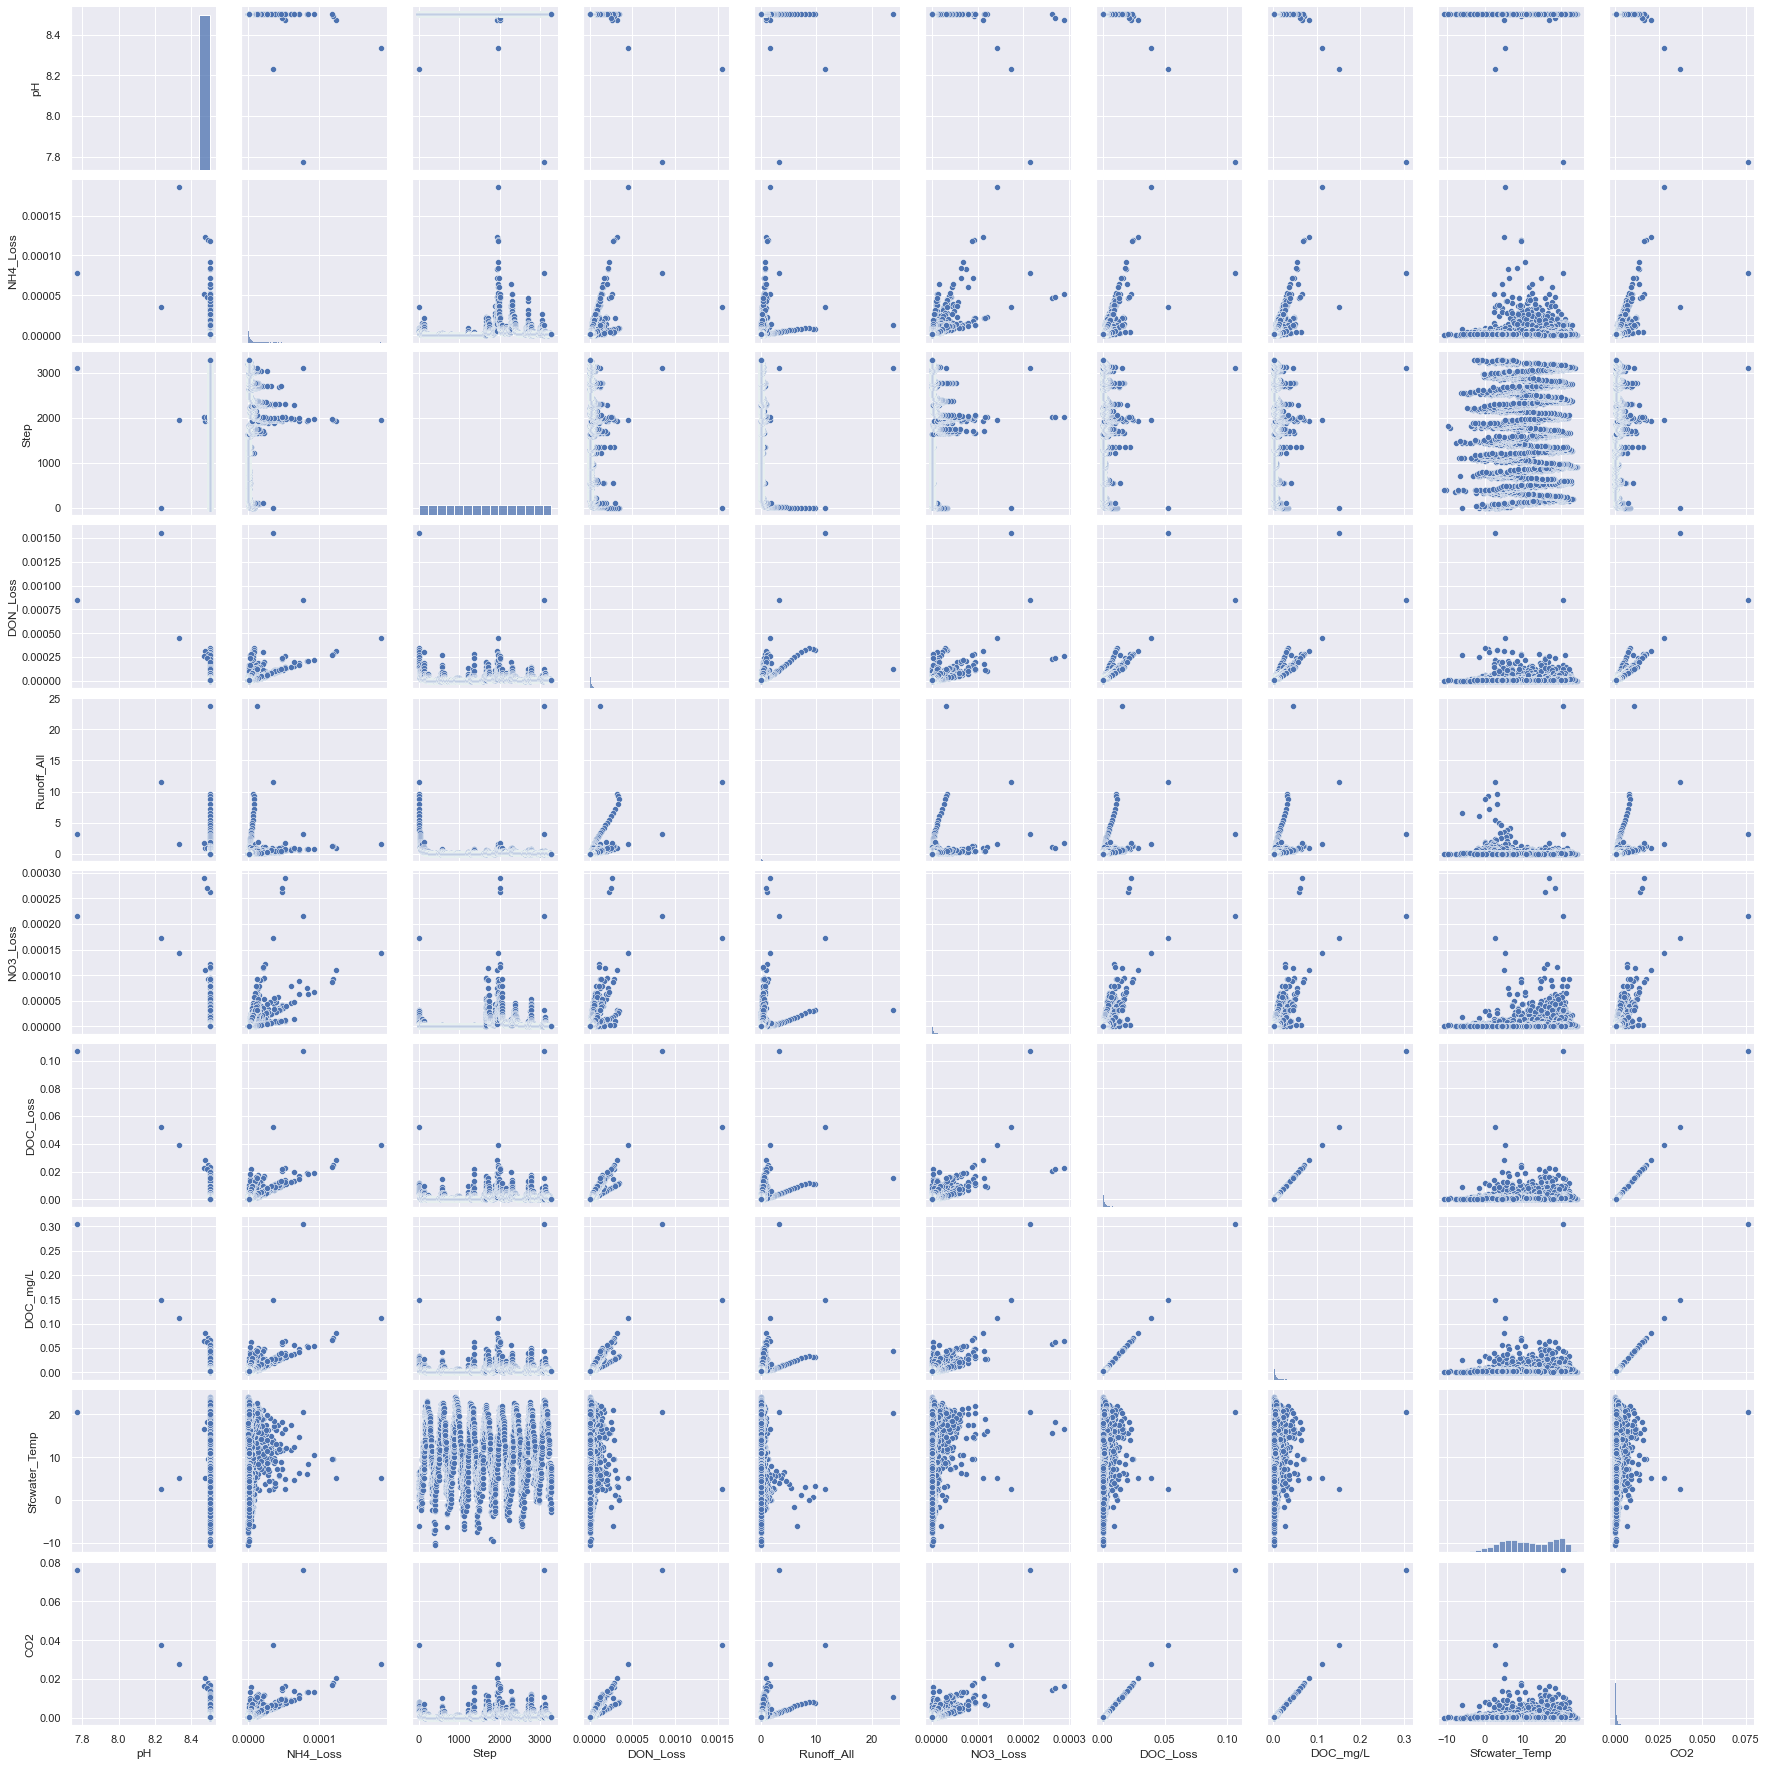

In [37]:
sns.pairplot(data_2.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);

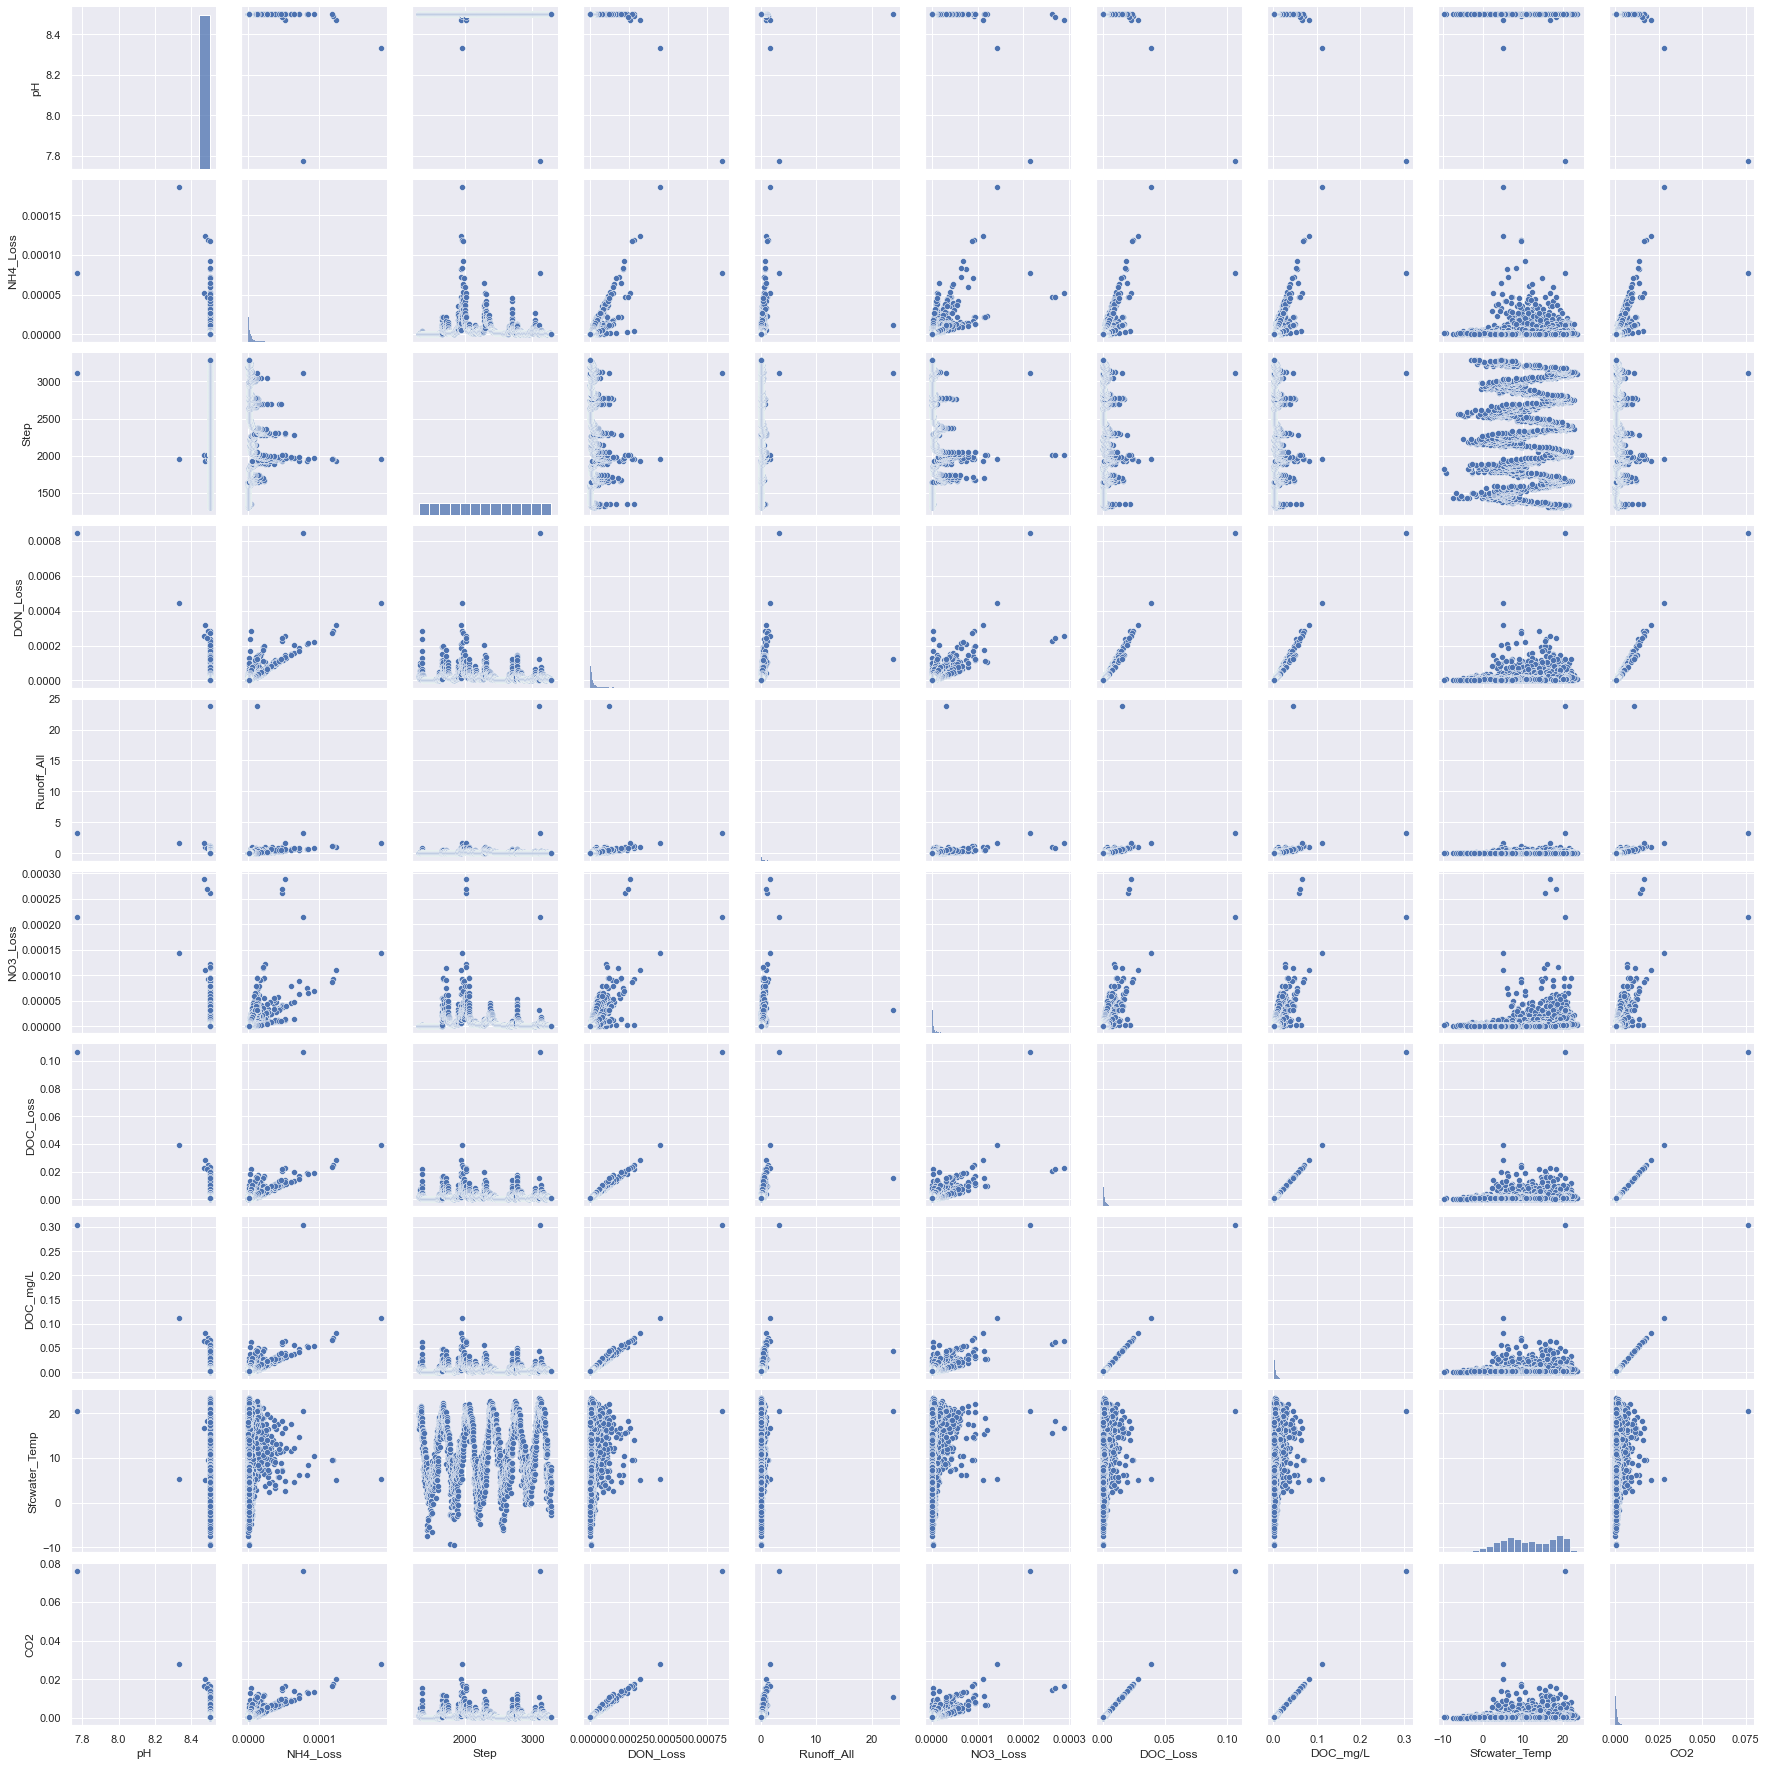

In [38]:
sns.pairplot(df_di_a.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);

In [39]:
import numpy as np

In [40]:
perc = [.10, .25, .5, .75, .90]; print(type(perc));

<class 'list'>


In [41]:
data_2.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  3287.000000                            3.287000e+03   
mean      8.499622                            3.438010e-06   
std       0.013838                            8.623039e-06   
min       7.773058                            6.251167e-08   
10%       8.500000                            9.847553e-08   
25%       8.500000                            1.837195e-07   
50%       8.500000                            1.115351e-06   
75%       8.500000                            3.157336e-06   
90%       8.500000                            7.744255e-06   
max       8.500000                            1.857148e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             1.878475e-05   
std                              4.489961e-05   
min                              4.437404e-07   
10%                              1.254987e-06   
25%                              2.640910e-06   
50%                              7.607403e-06   
75%                              1.906762e-05   
90%                              4.212358e-05   
max                              1.554523e-03   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.133986   
std                                 0.655423   
min                                 0.002260   
10%                                 0.003516   
25%                                 0.009623   
50%                                 0.026658   
75%                                 0.087338   
90%                                 0.271871   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             4.978473e-06   
std                              1.456515e-05   
min                              6.078583e-10   
10%                              2.022183e-08   
25%                              5.444385e-08   
50%                              8.069959e-07   
75%                              3.515388e-06   
90%                              1.343456e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             3287.000000  3287.000000       3287.000000   
mean                                 0.001490     0.004256         11.248536   
std                                  0.003241     0.009260          6.931090   
min                                  0.000029     0.000084        -10.562500   
10%                                  0.000075     0.000214          2.262500   
25%                                  0.000190     0.000544          5.787500   
50%                                  0.000657     0.001877         11.112499   
75%                                  0.001598     0.004565         17.712502   
90%                                  0.003388     0.009679         20.412498   
max                                  0.106680     0.304801         24.087502   

               CO2  
count  3287.000000  
mean      0.001064  
std       0.002315  
min       0.000021  
10%       0.000054  
25%       0.000136  
50%       0.000469  
75%       0.001141  
90%       0.002420  
max       0.076200

In [42]:
df_di_a.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000                            1.978000e+03   
mean      8.499508                            5.276231e-06   
std       0.016792                            1.062890e-05   
min       7.773058                            8.243249e-08   
10%       8.500000                            2.330465e-07   
25%       8.500000                            1.111031e-06   
50%       8.500000                            2.214690e-06   
75%       8.500000                            4.860416e-06   
90%       8.500000                            1.251450e-05   
max       8.500000                            1.857148e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             2.164288e-05   
std                              3.745176e-05   
min                              9.759353e-07   
10%                              2.553943e-06   
25%                              5.191316e-06   
50%                              1.061310e-05   
75%                              2.340793e-05   
90%                              4.908391e-05   
max                              8.446740e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.108443   
std                                 0.557444   
min                                 0.002260   
10%                                 0.005909   
25%                                 0.019538   
50%                                 0.042217   
75%                                 0.102724   
90%                                 0.254232   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             7.876538e-06   
std                              1.769875e-05   
min                              7.904378e-08   
10%                              8.898753e-08   
25%                              9.017865e-07   
50%                              2.540820e-06   
75%                              6.879975e-06   
90%                              2.084042e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.002072     0.005920         11.347358   
std                                  0.003771     0.010775          6.693310   
min                                  0.000075     0.000215         -9.512501   
10%                                  0.000231     0.000661          2.765000   
25%                                  0.000537     0.001533          6.162500   
50%                                  0.001101     0.003144         11.300000   
75%                                  0.002235     0.006385         17.562500   
90%                                  0.004525     0.012928         20.037498   
max                                  0.106680     0.304801         23.487500   

               CO2  
count  1978.000000  
mean      0.001480  
std       0.002694  
min       0.000054  
10%       0.000165  
25%       0.000383  
50%       0.000786  
75%       0.001596  
90%       0.003232  
max       0.076200

In [43]:
df_di_a.loc[df_di_a['Condition'] == 'Prefire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  313.0                            3.130000e+02   
mean     8.5                            2.808620e-07   
std      0.0                            3.906141e-07   
min      8.5                            8.243249e-08   
10%      8.5                            9.171854e-08   
25%      8.5                            1.186726e-07   
50%      8.5                            1.764803e-07   
75%      8.5                            2.885148e-07   
90%      8.5                            4.967247e-07   
max      8.5                            4.030530e-06   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.067065e-05   
std                              2.678670e-05   
min                              9.759353e-07   
10%                              1.095212e-06   
25%                              1.272336e-06   
50%                              2.550547e-06   
75%                              8.832043e-06   
90%                              2.546706e-05   
max                              2.804584e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.022621   
std                                 0.069063   
min                                 0.002260   
10%                                 0.002363   
25%                                 0.002523   
50%                                 0.004108   
75%                                 0.014628   
90%                                 0.049896   
max                                 0.794720   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.711287e-07   
std                              2.815616e-07   
min                              7.904378e-08   
10%                              7.985036e-08   
25%                              8.054705e-08   
50%                              8.301116e-08   
75%                              1.400028e-07   
90%                              3.296859e-07   
max                              2.944867e-06   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              313.000000  313.000000        313.000000   
mean                                 0.000837    0.002390          9.384385   
std                                  0.002102    0.006006          6.408665   
min                                  0.000075    0.000215         -7.412499   
10%                                  0.000085    0.000242          2.187500   
25%                                  0.000099    0.000282          5.037500   
50%                                  0.000199    0.000569          8.112500   
75%                                  0.000711    0.002031         14.787500   
90%                                  0.002030    0.005799         18.687500   
max                                  0.022068    0.063052         21.612500   

              CO2  
count  313.000000  
mean     0.000598  
std      0.001501  
min      0.000054  
10%      0.000060  
25%      0.000071  
50%      0.000142  
75%      0.000508  
90%      0.001450  
max      0.015763

In [44]:
df_di_a.loc[df_di_a['Condition'] == 'Postfire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                            1.665000e+03   
mean      8.499415                            6.215301e-06   
std       0.018302                            1.134103e-05   
min       7.773058                            4.983272e-07   
10%       8.500000                            1.067930e-06   
25%       8.500000                            1.345409e-06   
50%       8.500000                            2.762044e-06   
75%       8.500000                            5.693684e-06   
90%       8.500000                            1.405424e-05   
max       8.500000                            1.857148e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                             1665.000000   
mean                                 0.000024   
std                                  0.000039   
min                                  0.000002   
10%                                  0.000004   
25%                                  0.000006   
50%                                  0.000012   
75%                                  0.000025   
90%                                  0.000053   
max                                  0.000845   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.124576   
std                                 0.605520   
min                                 0.008005   
10%                                 0.017651   
25%                                 0.025408   
50%                                 0.053900   
75%                                 0.123497   
90%                                 0.278673   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             9.325062e-06   
std                              1.894426e-05   
min                              3.118361e-07   
10%                              8.590170e-07   
25%                              1.353519e-06   
50%                              3.232632e-06   
75%                              9.460433e-06   
90%                              2.411716e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.002304     0.006584         11.716374   
std                                  0.003966     0.011331          6.683227   
min                                  0.000180     0.000513         -9.512501   
10%                                  0.000373     0.001067          3.012500   
25%                                  0.000692     0.001976          6.462500   
50%                                  0.001245     0.003556         11.712500   
75%                                  0.002474     0.007069         18.012500   
90%                                  0.004995     0.014272         20.187500   
max                                  0.106680     0.304801         23.487500   

               CO2  
count  1665.000000  
mean      0.001646  
std       0.002833  
min       0.000128  
10%       0.000267  
25%       0.000494  
50%       0.000889  
75%       0.001767  
90%       0.003568  
max       0.076200

In [45]:
df_pools_dif = pools_di.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Sfcwater_Temp_C', 'Condition', 'Criteria'})

In [46]:
df_di_a.describe(percentiles=perc)

pH_1T   Unnamed: 0  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.499508  2297.500000                            5.276231e-06   
std       0.016792   571.143736                            1.062890e-05   
min       7.773058  1309.000000                            8.243249e-08   
10%       8.500000  1506.700000                            2.330465e-07   
25%       8.500000  1803.250000                            1.111031e-06   
50%       8.500000  2297.500000                            2.214690e-06   
75%       8.500000  2791.750000                            4.860416e-06   
90%       8.500000  3088.300000                            1.251450e-05   
max       8.500000  3286.000000                            1.857148e-04   

              Year         Step  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean   2003.769464  2297.500000                            2.164288e-05   
std       1.576393   571.143736                            3.745176e-05   
min    2001.000000  1309.000000                            9.759353e-07   
10%    2002.000000  1506.700000                            2.553943e-06   
25%    2002.000000  1803.250000                            5.191316e-06   
50%    2004.000000  2297.500000                            1.061310e-05   
75%    2005.000000  2791.750000                            2.340793e-05   
90%    2006.000000  3088.300000                            4.908391e-05   
max    2006.000000  3286.000000                            8.446740e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.108443   
std                                 0.557444   
min                                 0.002260   
10%                                 0.005909   
25%                                 0.019538   
50%                                 0.042217   
75%                                 0.102724   
90%                                 0.254232   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             7.876538e-06   
std                              1.769875e-05   
min                              7.904378e-08   
10%                              8.898753e-08   
25%                              9.017865e-07   
50%                              2.540820e-06   
75%                              6.879975e-06   
90%                              2.084042e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.002072     0.005920         11.347358   
std                                  0.003771     0.010775          6.693310   
min                                  0.000075     0.000215         -9.512501   
10%                                  0.000231     0.000661          2.765000   
25%                                  0.000537     0.001533          6.162500   
50%                                  0.001101     0.003144         11.300000   
75%                                  0.002235     0.006385         17.562500   
90%                                  0.004525     0.012928         20.037498   
max                                  0.106680     0.304801         23.487500   

               CO2  Alk_140  
count  1978.000000   1978.0  
mean      0.001480    140.0  
std       0.002694      0.0  
min       0.000054    140.0  
10%       0.000165    140.0  
25%       0.000383    140.0  
50%       0.000786    140.0  
75%       0.001596    140.0  
90%       0.003232    140.0  
max       0.076200    140.0

In [47]:
df_di_a_lr = df_di_a.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(df_di_a.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})



In [48]:
df_di_a_lr

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average         Year  \
slope     -7.860605e-07                           -1.078644e-09     0.002713   
intercept  8.501314e+00                            7.754415e-06  1997.536209   
rvalue    -2.673537e-02                           -5.796093e-02     0.982970   
p-value    2.346330e-01                            9.927805e-03     0.000000   
stderr     6.611820e-07                            4.179444e-10     0.000011   

           Step  DON_Loss(gN/day/m2)_Delineated_Average  \
slope       1.0                           -6.847573e-09   
intercept   0.0                            3.737517e-05   
rvalue      1.0                           -1.044263e-01   
p-value     0.0                            3.253627e-06   
stderr      0.0                            1.467075e-09   

           Runoff_All(mm/day)_Delineated_Average  \
slope                                   0.000023   
intercept                               0.056110   
rvalue                                  0.023338   
p-value                                 0.299532   
stderr                                  0.000022   

           NO3_Loss(gN/day/m2)_Delineated_Average  \
slope                               -4.058542e-09   
intercept                            1.720104e-05   
rvalue                              -1.309703e-01   
p-value                              5.023705e-09   
stderr                               6.911090e-10   

           DOC_Loss(gC/day/m2)_Delineated_Average      DOC_mg/L  \
slope                               -1.967921e-07 -5.622630e-07   
intercept                            2.524259e-03  7.212168e-03   
rvalue                              -2.980354e-02 -2.980354e-02   
p-value                              1.851843e-01  1.851843e-01   
stderr                               1.484750e-07  4.242142e-07   

           Sfc_Water_Temp_C           CO2  Alk_140  
slope              0.000758 -1.405658e-07      0.0  
intercept          9.606002  1.803042e-03    140.0  
rvalue             0.064675 -2.980354e-02      0.0  
p-value            0.004007  1.851843e-01      1.0  
stderr             0.000263  1.060535e-07      0.0

In [49]:
df_pools_dif.head()

Step  Runoff_All(mm/day)_Delineated_Average  \
0  1309                               0.033262   
1  1310                               0.049177   
2  1311                               0.059757   
3  1312                               0.043195   
4  1313                               0.033943   

   DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            1.723506                           62.738377   
1                            1.723847                           62.793880   
2                            1.724198                           62.850475   
3                            1.724548                           62.906460   
4                            1.724893                           62.960121   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  
0                            0.217127                            0.052923  
1                            0.218450                            0.053354  
2                            0.216998                            0.053638  
3                            0.215868                            0.053804  
4                            0.215562                            0.053926

In [50]:
df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average']; 
df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'];
df_di_a['NO3_Pool'] = df_pools_dif['NO3_Pool(gN/m2)_Delineated_Average']

<ipython-input-50-5a278c380552>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'];
<ipython-input-50-5a278c380552>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'];
<ipython-input-50-5a278c380552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [51]:
df_di_a['Criteria'] = str('Meets')

<ipython-input-51-63546f0ec94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['Criteria'] = str('Meets')


In [52]:
df_di_a.describe(percentiles=perc)

pH_1T   Unnamed: 0  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.499508  2297.500000                            5.276231e-06   
std       0.016792   571.143736                            1.062890e-05   
min       7.773058  1309.000000                            8.243249e-08   
10%       8.500000  1506.700000                            2.330465e-07   
25%       8.500000  1803.250000                            1.111031e-06   
50%       8.500000  2297.500000                            2.214690e-06   
75%       8.500000  2791.750000                            4.860416e-06   
90%       8.500000  3088.300000                            1.251450e-05   
max       8.500000  3286.000000                            1.857148e-04   

              Year         Step  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean   2003.769464  2297.500000                            2.164288e-05   
std       1.576393   571.143736                            3.745176e-05   
min    2001.000000  1309.000000                            9.759353e-07   
10%    2002.000000  1506.700000                            2.553943e-06   
25%    2002.000000  1803.250000                            5.191316e-06   
50%    2004.000000  2297.500000                            1.061310e-05   
75%    2005.000000  2791.750000                            2.340793e-05   
90%    2006.000000  3088.300000                            4.908391e-05   
max    2006.000000  3286.000000                            8.446740e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.108443   
std                                 0.557444   
min                                 0.002260   
10%                                 0.005909   
25%                                 0.019538   
50%                                 0.042217   
75%                                 0.102724   
90%                                 0.254232   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             7.876538e-06   
std                              1.769875e-05   
min                              7.904378e-08   
10%                              8.898753e-08   
25%                              9.017865e-07   
50%                              2.540820e-06   
75%                              6.879975e-06   
90%                              2.084042e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.002072     0.005920         11.347358   
std                                  0.003771     0.010775          6.693310   
min                                  0.000075     0.000215         -9.512501   
10%                                  0.000231     0.000661          2.765000   
25%                                  0.000537     0.001533          6.162500   
50%                                  0.001101     0.003144         11.300000   
75%                                  0.002235     0.006385         17.562500   
90%                                  0.004525     0.012928         20.037498   
max                                  0.106680     0.304801         23.487500   

               CO2  Alk_140    DOC_Pool    NH4_Pool    NO3_Pool  
count  1978.000000   1978.0  669.000000  669.000000  669.000000  
mean      0.001480    140.0  118.161414    1.069218    0.535029  
std       0.002694      0.0    7.210658    0.265103    0.119817  
min       0.000054    140.0  106.092155    0.743291    0.333386  
10%       0.000165    140.0  107.405908    0.767680    0.338087  
25%       0.000

In [53]:
df_di_a['Criteria'].unique()

array(['Meets'], dtype=object)

In [54]:
criteria_mask = df_di_a[((df_di_a['NH4_Pool'] > 0.569) & (df_di_a['pH_1T'] == 8.5) | ((df_di_a['NH4_Pool'] >  1.27) & (df_di_a['pH_1T'] == 8.0)) | (df_di_a['NO3_Pool'] > 1.59))];

In [55]:
criteria_mask

pH_1T  Unnamed: 0  NH4_Loss(gN/day/m2)_Delineated_Average  Year  Step  \
1309    8.5        1309                            2.683968e-07  2001  1309   
1310    8.5        1310                            3.533067e-07  2001  1310   
1311    8.5        1311                            4.222335e-07  2001  1311   
1312    8.5        1312                            3.216508e-07  2001  1312   
1313    8.5        1313                            2.650055e-07  2001  1313   
...     ...         ...                                     ...   ...   ...   
1973    8.5        1973                            2.552878e-05  2003  1973   
1974    8.5        1974                            2.485254e-05  2003  1974   
1975    8.5        1975                            2.483192e-05  2003  1975   
1976    8.5        1976                            2.077282e-05  2003  1976   
1977    8.5        1977                            1.901842e-05  2003  1977   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000018   
1310                                0.000024   
1311                                0.000031   
1312                                0.000023   
1313                                0.000019   
...                                      ...   
1973                                0.000063   
1974                                0.000060   
1975                                0.000060   
1976                                0.000050   
1977                                0.000046   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033262   
1310                               0.049177   
1311                               0.059757   
1312                               0.043195   
1313                               0.033943   
...                                     ...   
1973                               0.272409   
1974                               0.320624   
1975                               0.239134   
1976                               0.212668   
1977                               0.225390   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.677347e-07   
1310                            3.472315e-07   
1311                            4.345409e-07   
1312                            3.428635e-07   
1313                            2.838032e-07   
...                                      ...   
1973                            1.961510e-05   
1974                            1.926323e-05   
1975                            1.942874e-05   
1976                            1.664211e-05   
1977                            1.562734e-05   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.001378  0.003938         20.112500   
1310                                0.001842  0.005262         19.737500   
1311                                0.002379  0.006797         19.962502   
1312                                0.001802  0.005148         19.812500   
1313                                0.001439  0.004112         19.287498   
...                                      ...       ...               ...   
1973                                0.005258  0.015022         15.387501   
1974                                0.005042  0.014405         12.987499   
1975                                0.004983  0.014238         14.112499   
1976                                0.004186  0.011959         17.562500   
1977                                0.003808  0.010881         18.687500   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  
1309  0.000984      140   Prefire    Meets  106.092155  1.185786  0.335406  
1310  0.001315      140   Prefire    Meets  106.104927  1.189233  0.335255  
1311  0.001699      140   Prefire    Meets  106.118408  1.192101  0.335101  
1312  0.001287      140   Prefire    Meets  106.126541  1.195152  0.334994  
1313  0.001028      140   Prefire    Mee

In [56]:
df_di_a['Criteria'].loc[criteria_mask.index] = str('Exceeds')

C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [57]:
df_di_a['Criteria'].unique()

array(['Exceeds', 'Meets'], dtype=object)

In [66]:
criteria_mask.drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('08092120APR21b_exceed_allstats.csv')

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  666.0                            6.660000e+02   
mean     8.5                            5.014315e-06   
std      0.0                            1.147975e-05   
min      8.5                            8.243249e-08   
10%      8.5                            1.111565e-07   
25%      8.5                            1.914125e-07   
50%      8.5                            1.083904e-06   
75%      8.5                            4.287199e-06   
90%      8.5                            1.207859e-05   
max      8.5                            1.176906e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            6.660000e+02   
mean                             2.457685e-05   
std                              3.781298e-05   
min                              9.759353e-07   
10%                              1.213939e-06   
25%                              2.735412e-06   
50%                              9.970820e-06   
75%                              2.852364e-05   
90%                              6.583423e-05   
max                              2.804584e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                             666.000000   
mean                                0.064417   
std                                 0.123716   
min                                 0.002260   
10%                                 0.002481   
25%                                 0.004362   
50%                                 0.018036   
75%                                 0.059100   
90%                                 0.183811   
max                                 1.198491   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            6.660000e+02   
mean                             8.221884e-06   
std                              1.468553e-05   
min                              7.904378e-08   
10%                              8.033851e-08   
25%                              8.345175e-08   
50%                              1.013462e-06   
75%                              9.815744e-06   
90%                              2.543925e-05   
max                              1.135437e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              666.000000  666.000000        666.000000   
mean                                 0.002096    0.005990         10.276914   
std                                  0.003220    0.009200          6.465338   
min                                  0.000075    0.000215         -9.512501   
10%                                  0.000094    0.000269          2.262500   
25%                                  0.000216    0.000617          5.731250   
50%                                  0.000844    0.002413          9.950000   
75%                                  0.002412    0.006891         15.743751   
90%                                  0.005829    0.016653         18.912498   
max                                  0.023496    0.067132         22.287498   

         DOC_Pool    NH4_Pool    NO3_Pool  
count  666.000000  666.000000  666.000000  
mean   118.109438    1.069810    0.534313  
std      7.185037    0.265545    0.119608  
min    106.092155    0.743291    0.333386  
10%    107.396046    0.767578    0.337891  
25%    113.051956    0.805287    0.484646  
50%    117.725658    0.997741    0.499525  
75%    123.614397    1.324987    0.675518  
90%    129.177460    1.458356    0.699024  
max    129.963959    1.553487    0.717790

In [67]:
criteria_mask.loc[criteria_mask['Condition'] == 'Prefire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('08092120APR21b_exceed_pfstats.csv')

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  313.0                            3.130000e+02   
mean     8.5                            2.808620e-07   
std      0.0                            3.906141e-07   
min      8.5                            8.243249e-08   
10%      8.5                            9.171854e-08   
25%      8.5                            1.186726e-07   
50%      8.5                            1.764803e-07   
75%      8.5                            2.885148e-07   
90%      8.5                            4.967247e-07   
max      8.5                            4.030530e-06   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.067065e-05   
std                              2.678670e-05   
min                              9.759353e-07   
10%                              1.095212e-06   
25%                              1.272336e-06   
50%                              2.550547e-06   
75%                              8.832043e-06   
90%                              2.546706e-05   
max                              2.804584e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.022621   
std                                 0.069063   
min                                 0.002260   
10%                                 0.002363   
25%                                 0.002523   
50%                                 0.004108   
75%                                 0.014628   
90%                                 0.049896   
max                                 0.794720   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.711287e-07   
std                              2.815616e-07   
min                              7.904378e-08   
10%                              7.985036e-08   
25%                              8.054705e-08   
50%                              8.301116e-08   
75%                              1.400028e-07   
90%                              3.296859e-07   
max                              2.944867e-06   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              313.000000  313.000000        313.000000   
mean                                 0.000837    0.002390          9.384385   
std                                  0.002102    0.006006          6.408665   
min                                  0.000075    0.000215         -7.412499   
10%                                  0.000085    0.000242          2.187500   
25%                                  0.000099    0.000282          5.037500   
50%                                  0.000199    0.000569          8.112500   
75%                                  0.000711    0.002031         14.787500   
90%                                  0.002030    0.005799         18.687500   
max                                  0.022068    0.063052         21.612500   

         DOC_Pool    NH4_Pool    NO3_Pool  
count  313.000000  313.000000  313.000000  
mean   112.094990    1.060013    0.446673  
std      4.127200    0.245975    0.073156  
min    106.092155    0.745883    0.333386  
10%    106.604164    0.770473    0.333981  
25%    107.732010    0.822656    0.349348  
50%    112.465546    1.000881    0.487694  
75%    116.330841    1.293288    0.501243  
90%    117.173914    1.425000    0.511222  
max    117.523033    1.475146    0.519339

In [68]:
criteria_mask.loc[criteria_mask['Condition'] == 'Postfire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Unnamed: 0', 'Step', 'Year'}).describe(percentiles=perc)#.to_csv('08092120APR21b_exceed_pofstats.csv')

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  353.0                            3.530000e+02   
mean     8.5                            9.211399e-06   
std      0.0                            1.453424e-05   
min      8.5                            5.908923e-07   
10%      8.5                            1.173048e-06   
25%      8.5                            1.715149e-06   
50%      8.5                            4.023607e-06   
75%      8.5                            9.166808e-06   
90%      8.5                            2.348371e-05   
max      8.5                            1.176906e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                              353.000000   
mean                                 0.000037   
std                                  0.000042   
min                                  0.000005   
10%                                  0.000006   
25%                                  0.000010   
50%                                  0.000021   
75%                                  0.000046   
90%                                  0.000090   
max                                  0.000272   

       Runoff_All(mm/day)_Delineated_Average  \
count                             353.000000   
mean                                0.101476   
std                                 0.147503   
min                                 0.008005   
10%                                 0.010965   
25%                                 0.017803   
50%                                 0.042291   
75%                                 0.111992   
90%                                 0.270756   
max                                 1.198491   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.530000e+02   
mean                             1.536037e-05   
std                              1.728086e-05   
min                              3.118361e-07   
10%                              2.080799e-06   
25%                              3.743025e-06   
50%                              8.292561e-06   
75%                              2.144393e-05   
90%                              3.547008e-05   
max                              1.135437e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              353.000000  353.000000        353.000000   
mean                                 0.003213    0.009181         11.068307   
std                                  0.003607    0.010305          6.421029   
min                                  0.000411    0.001175         -9.512501   
10%                                  0.000566    0.001616          2.367500   
25%                                  0.000840    0.002400          6.912500   
50%                                  0.001783    0.005094         11.487499   
75%                                  0.003981    0.011374         16.737500   
90%                                  0.007776    0.022217         18.972500   
max                                  0.023496    0.067132         22.287498   

         DOC_Pool    NH4_Pool    NO3_Pool  
count  353.000000  353.000000  353.000000  
mean   123.442363    1.078497    0.612021  
std      4.663155    0.281827    0.096944  
min    117.538765    0.743291    0.483462  
10%    117.911577    0.767355    0.484138  
25%    118.651138    0.792422    0.486058  
50%    122.840240    0.997533    0.669441  
75%    128.640518    1.347926    0.695279  
90%    129.641400    1.491896    0.708121  
max    129.963959    1.553487    0.717790

In [72]:
bc_pf = df_di_a.loc[df_di_a['Condition'] == 'Prefire']; bc_pf.head()

pH_1T  Unnamed: 0  NH4_Loss(gN/day/m2)_Delineated_Average  Year  Step  \
1309    8.5        1309                            2.683968e-07  2001  1309   
1310    8.5        1310                            3.533067e-07  2001  1310   
1311    8.5        1311                            4.222335e-07  2001  1311   
1312    8.5        1312                            3.216508e-07  2001  1312   
1313    8.5        1313                            2.650055e-07  2001  1313   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000018   
1310                                0.000024   
1311                                0.000031   
1312                                0.000023   
1313                                0.000019   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033262   
1310                               0.049177   
1311                               0.059757   
1312                               0.043195   
1313                               0.033943   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.677347e-07   
1310                            3.472315e-07   
1311                            4.345409e-07   
1312                            3.428635e-07   
1313                            2.838032e-07   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.001378  0.003938         20.112500   
1310                                0.001842  0.005262         19.737500   
1311                                0.002379  0.006797         19.962502   
1312                                0.001802  0.005148         19.812500   
1313                                0.001439  0.004112         19.287498   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  
1309  0.000984      140   Prefire  Exceeds  106.092155  1.185786  0.335406  
1310  0.001315      140   Prefire  Exceeds  106.104927  1.189233  0.335255  
1311  0.001699      140   Prefire  Exceeds  106.118408  1.192101  0.335101  
1312  0.001287      140   Prefire  Exceeds  106.126541  1.195152  0.334994  
1313  0.001028      140   Prefire  Exceeds  106.133606  1.198187  0.334891

In [74]:
bc_pf_lr = bc_pf.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Year', 'Step'}).apply(lambda x:stats.linregress(bc_pf.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [75]:
bc_pf_lr

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average  \
slope        0.0                           -2.007772e-10   
intercept    8.5                            5.750006e-07   
rvalue       0.0                           -4.651712e-02   
p-value      1.0                            4.121458e-01   
stderr       0.0                            2.444843e-10   

           DON_Loss(gN/day/m2)_Delineated_Average  \
slope                               -9.037166e-08   
intercept                            1.430651e-04   
rvalue                              -3.053229e-01   
p-value                              3.542107e-08   
stderr                               1.598244e-08   

           Runoff_All(mm/day)_Delineated_Average  \
slope                              -2.120835e-04   
intercept                           3.333231e-01   
rvalue                             -2.779109e-01   
p-value                             5.858290e-07   
stderr                              4.156872e-05   

           NO3_Loss(gN/day/m2)_Delineated_Average  \
slope                               -1.105324e-09   
intercept                            1.790428e-06   
rvalue                              -3.552732e-01   
p-value                              9.629827e-11   
stderr                               1.649104e-10   

           DOC_Loss(gC/day/m2)_Delineated_Average      DOC_mg/L  \
slope                               -6.971679e-06 -1.991908e-05   
intercept                            1.105010e-02  3.157172e-02   
rvalue                              -3.001480e-01 -3.001480e-01   
p-value                              6.154349e-08  6.154349e-08   
stderr                               1.256381e-06  3.589659e-06   

           Sfc_Water_Temp_C           CO2  Alk_140       DOC_Pool  \
slope         -1.946139e-02 -4.979771e-06      0.0   4.489375e-02   
intercept      3.789533e+01  7.892930e-03    140.0   4.632565e+01   
rvalue        -2.748228e-01 -3.001480e-01      0.0   9.844118e-01   
p-value        7.890123e-07  6.154349e-08      1.0  8.388403e-237   
stderr         3.860895e-03  8.974148e-07      0.0   4.548240e-04   

               NH4_Pool      NO3_Pool  
slope     -1.729183e-03  6.314014e-04  
intercept  3.593266e+00 -4.783299e-01  
rvalue    -6.362026e-01  7.810957e-01  
p-value    6.530293e-37  1.422481e-65  
stderr     1.189087e-04  2.862147e-05

In [73]:
bc_pf.head(); bc_pf.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average         Year        Step  \
count  313.0                            3.130000e+02   313.000000   313.00000   
mean     8.5                            2.808620e-07  2001.514377  1465.00000   
std      0.0                            3.906141e-07     0.500594    90.49954   
min      8.5                            8.243249e-08  2001.000000  1309.00000   
10%      8.5                            9.171854e-08  2001.000000  1340.20000   
25%      8.5                            1.186726e-07  2001.000000  1387.00000   
50%      8.5                            1.764803e-07  2002.000000  1465.00000   
75%      8.5                            2.885148e-07  2002.000000  1543.00000   
90%      8.5                            4.967247e-07  2002.000000  1589.80000   
max      8.5                            4.030530e-06  2002.000000  1621.00000   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.067065e-05   
std                              2.678670e-05   
min                              9.759353e-07   
10%                              1.095212e-06   
25%                              1.272336e-06   
50%                              2.550547e-06   
75%                              8.832043e-06   
90%                              2.546706e-05   
max                              2.804584e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.022621   
std                                 0.069063   
min                                 0.002260   
10%                                 0.002363   
25%                                 0.002523   
50%                                 0.004108   
75%                                 0.014628   
90%                                 0.049896   
max                                 0.794720   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.711287e-07   
std                              2.815616e-07   
min                              7.904378e-08   
10%                              7.985036e-08   
25%                              8.054705e-08   
50%                              8.301116e-08   
75%                              1.400028e-07   
90%                              3.296859e-07   
max                              2.944867e-06   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              313.000000  313.000000        313.000000   
mean                                 0.000837    0.002390          9.384385   
std                                  0.002102    0.006006          6.408665   
min                                  0.000075    0.000215         -7.412499   
10%                                  0.000085    0.000242          2.187500   
25%                                  0.000099    0.000282          5.037500   
50%                                  0.000199    0.000569          8.112500   
75%                                  0.000711    0.002031         14.787500   
90%                                  0.002030    0.005799         18.687500   
max                                  0.022068    0.063052         21.612500   

              CO2  Alk_140    DOC_Pool    NH4_Pool    NO3_Pool  
count  313.000000    313.0  313.000000  313.000000  313.000000  
mean     0.000598    140.0  112.094990    1.060013    0.446673  
std      0.001501      0.0    4.127200    0.245975    0.073156  
min      0.000054    140.0  106.092155    0.745883    0.333386  
10%      0.000060    140.0  106.604164    0.770473    0.333981  
25%      0.000071    140.0  107.732010    0.822656    0.349348  
50%      0.000142    140.0  112.465546    1.000881    0.487694  
75%      0.000508    140.0  116.330841    1.293288    0.501243  
90%      0.001450    140.0  117.173914    1.425000 

In [71]:
bc_pof = df_di_a.loc[df_di_a['Condition'] == 'Postfire']; bc_pof.head(); bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average         Year  \
count  1665.000000                            1.665000e+03  1665.000000   
mean      8.499415                            6.215301e-06  2004.193393   
std       0.018302                            1.134103e-05     1.330063   
min       7.773058                            4.983272e-07  2002.000000   
10%       8.500000                            1.067930e-06  2002.000000   
25%       8.500000                            1.345409e-06  2003.000000   
50%       8.500000                            2.762044e-06  2004.000000   
75%       8.500000                            5.693684e-06  2005.000000   
90%       8.500000                            1.405424e-05  2006.000000   
max       8.500000                            1.857148e-04  2006.000000   

              Step  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                             1665.000000   
mean   2454.000000                                0.000024   
std     480.788415                                0.000039   
min    1622.000000                                0.000002   
10%    1788.400000                                0.000004   
25%    2038.000000                                0.000006   
50%    2454.000000                                0.000012   
75%    2870.000000                                0.000025   
90%    3119.600000                                0.000053   
max    3286.000000                                0.000845   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.124576   
std                                 0.605520   
min                                 0.008005   
10%                                 0.017651   
25%                                 0.025408   
50%                                 0.053900   
75%                                 0.123497   
90%                                 0.278673   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             9.325062e-06   
std                              1.894426e-05   
min                              3.118361e-07   
10%                              8.590170e-07   
25%                              1.353519e-06   
50%                              3.232632e-06   
75%                              9.460433e-06   
90%                              2.411716e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.002304     0.006584         11.716374   
std                                  0.003966     0.011331          6.683227   
min                                  0.000180     0.000513         -9.512501   
10%                                  0.000373     0.001067          3.012500   
25%                                  0.000692     0.001976          6.462500   
50%                                  0.001245     0.003556         11.712500   
75%                                  0.002474     0.007069         18.012500   
90%                                  0.004995     0.014272         20.187500   
max                                  0.106680     0.304801         23.487500   

               CO2  Alk_140    DOC_Pool    NH4_Pool    NO3_Pool  
count  1665.000000   1665.0  356.000000  356.000000  356.000000  
mean      0.001646    140.0  123.495097    1.077311    0.612713  
std       0.002833      0.0    4.678618    0.280942    0.096826  
min       0.000128    140.0  117.538765    0.743291    0.483462  
10%       0.000267    140.0  117.915127    0.767374    0.484146  
25%       0.000494    140.0  118.664373    0.795106    0.486067  
50%       0.000889    140.0  122.956245    0.989448    0.670043  
75%       0.001767    140.

In [86]:
bc_pof_lr = bc_pof.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Year', 'Step'}).apply(lambda x:stats.linregress(bc_pof.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

C:\Users\KVENABLE\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\KVENABLE\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\KVENABLE\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [88]:
bc_pof_lr

pH_1T  NH4_Loss(gN/day/m2)_Delineated_Average  \
slope     -9.219116e-07                           -5.827341e-09   
intercept  8.501678e+00                            2.051560e-05   
rvalue    -2.421790e-02                           -2.470426e-01   
p-value    3.233486e-01                            1.427629e-24   
stderr     9.332097e-07                            5.605035e-10   

           DON_Loss(gN/day/m2)_Delineated_Average  \
slope                               -1.971072e-08   
intercept                            7.207563e-05   
rvalue                              -2.442776e-01   
p-value                              4.802843e-24   
stderr                               1.918724e-09   

           Runoff_All(mm/day)_Delineated_Average  \
slope                                  -0.000029   
intercept                               0.196891   
rvalue                                 -0.023398   
p-value                                 0.340001   
stderr                                  0.000031   

           NO3_Loss(gN/day/m2)_Delineated_Average  \
slope                               -1.299850e-08   
intercept                            4.122339e-05   
rvalue                              -3.298905e-01   
p-value                              1.459067e-43   
stderr                               9.121333e-10   

           DOC_Loss(gC/day/m2)_Delineated_Average      DOC_mg/L  \
slope                               -1.277972e-06 -3.651348e-06   
intercept                            5.440538e-03  1.554440e-02   
rvalue                              -1.549316e-01 -1.549316e-01   
p-value                              2.076756e-10  2.076756e-10   
stderr                               1.998294e-07  5.709411e-07   

           Sfc_Water_Temp_C           CO2  Alk_140  DOC_Pool  NH4_Pool  \
slope             -0.000180 -9.128371e-07      0.0       NaN       NaN   
intercept         12.157374  3.886099e-03    140.0       NaN       NaN   
rvalue            -0.012928 -1.549316e-01      0.0       NaN       NaN   
p-value            0.598092  2.076756e-10      1.0       NaN       NaN   
stderr             0.000341  1.427353e-07      0.0       NaN       NaN   

           NO3_Pool  
slope           NaN  
intercept       NaN  
rvalue          NaN  
p-value         NaN  
stderr          NaN

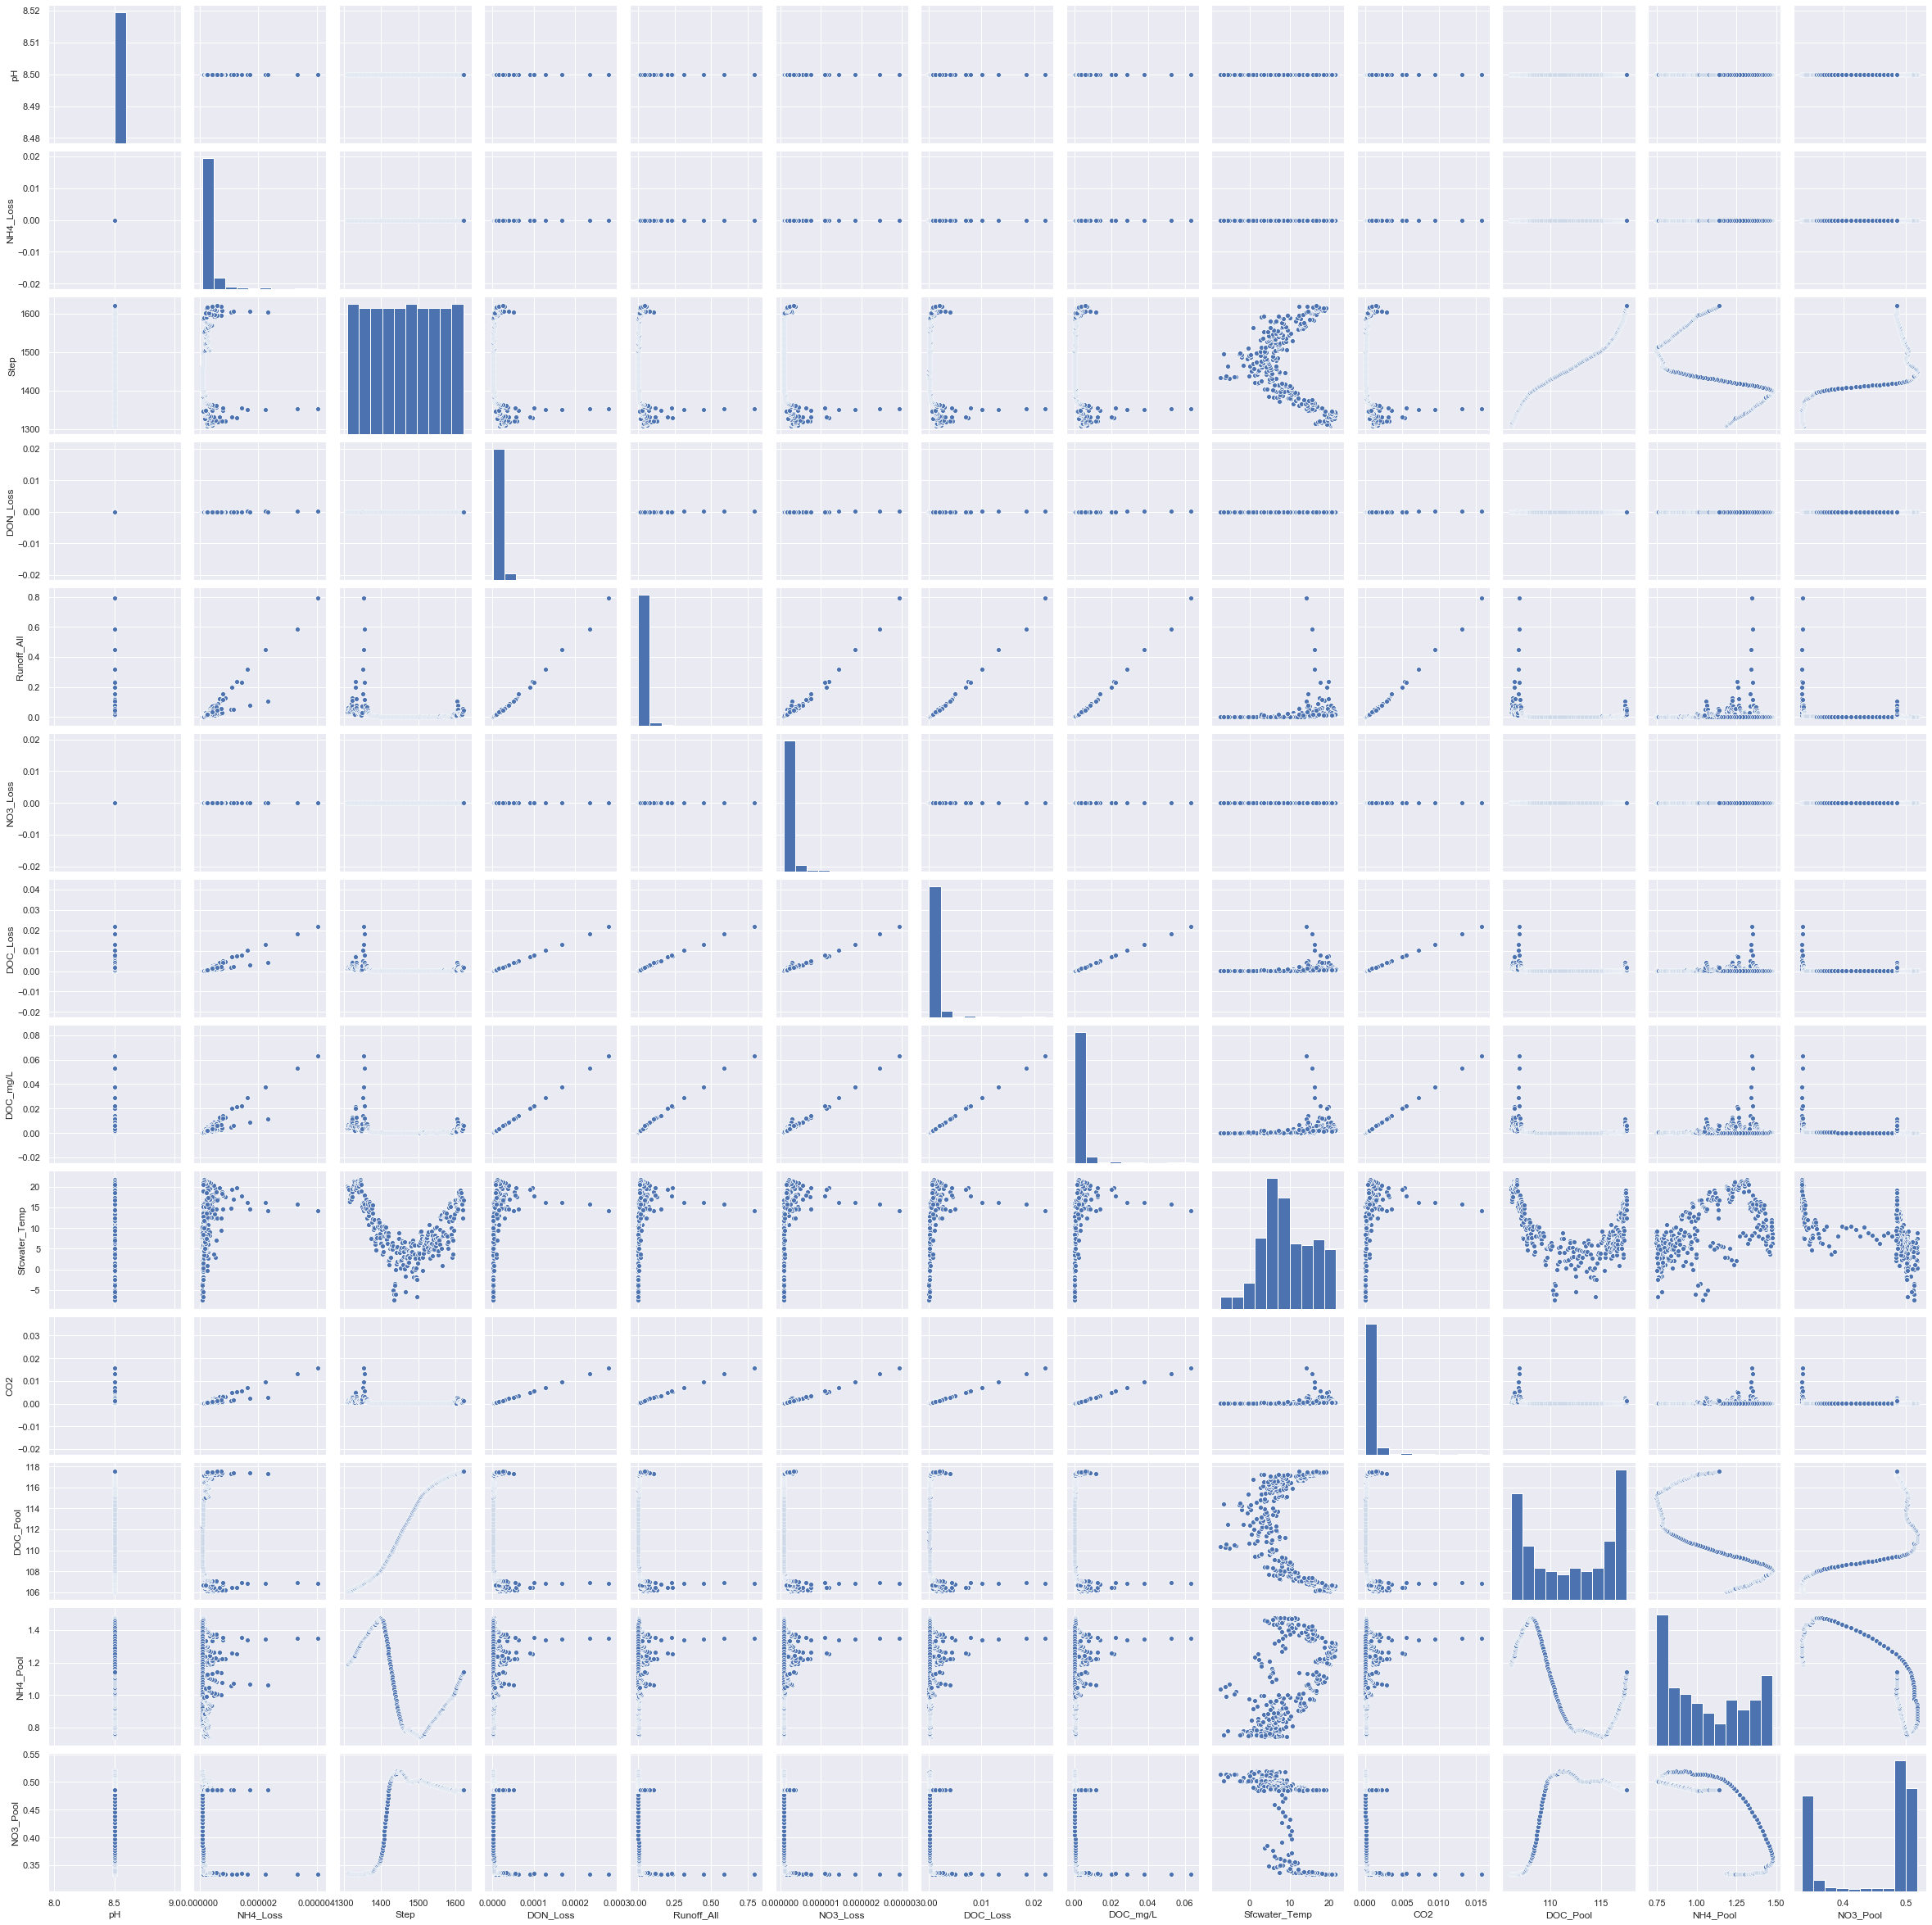

In [89]:
sns.pairplot(bc_pf.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

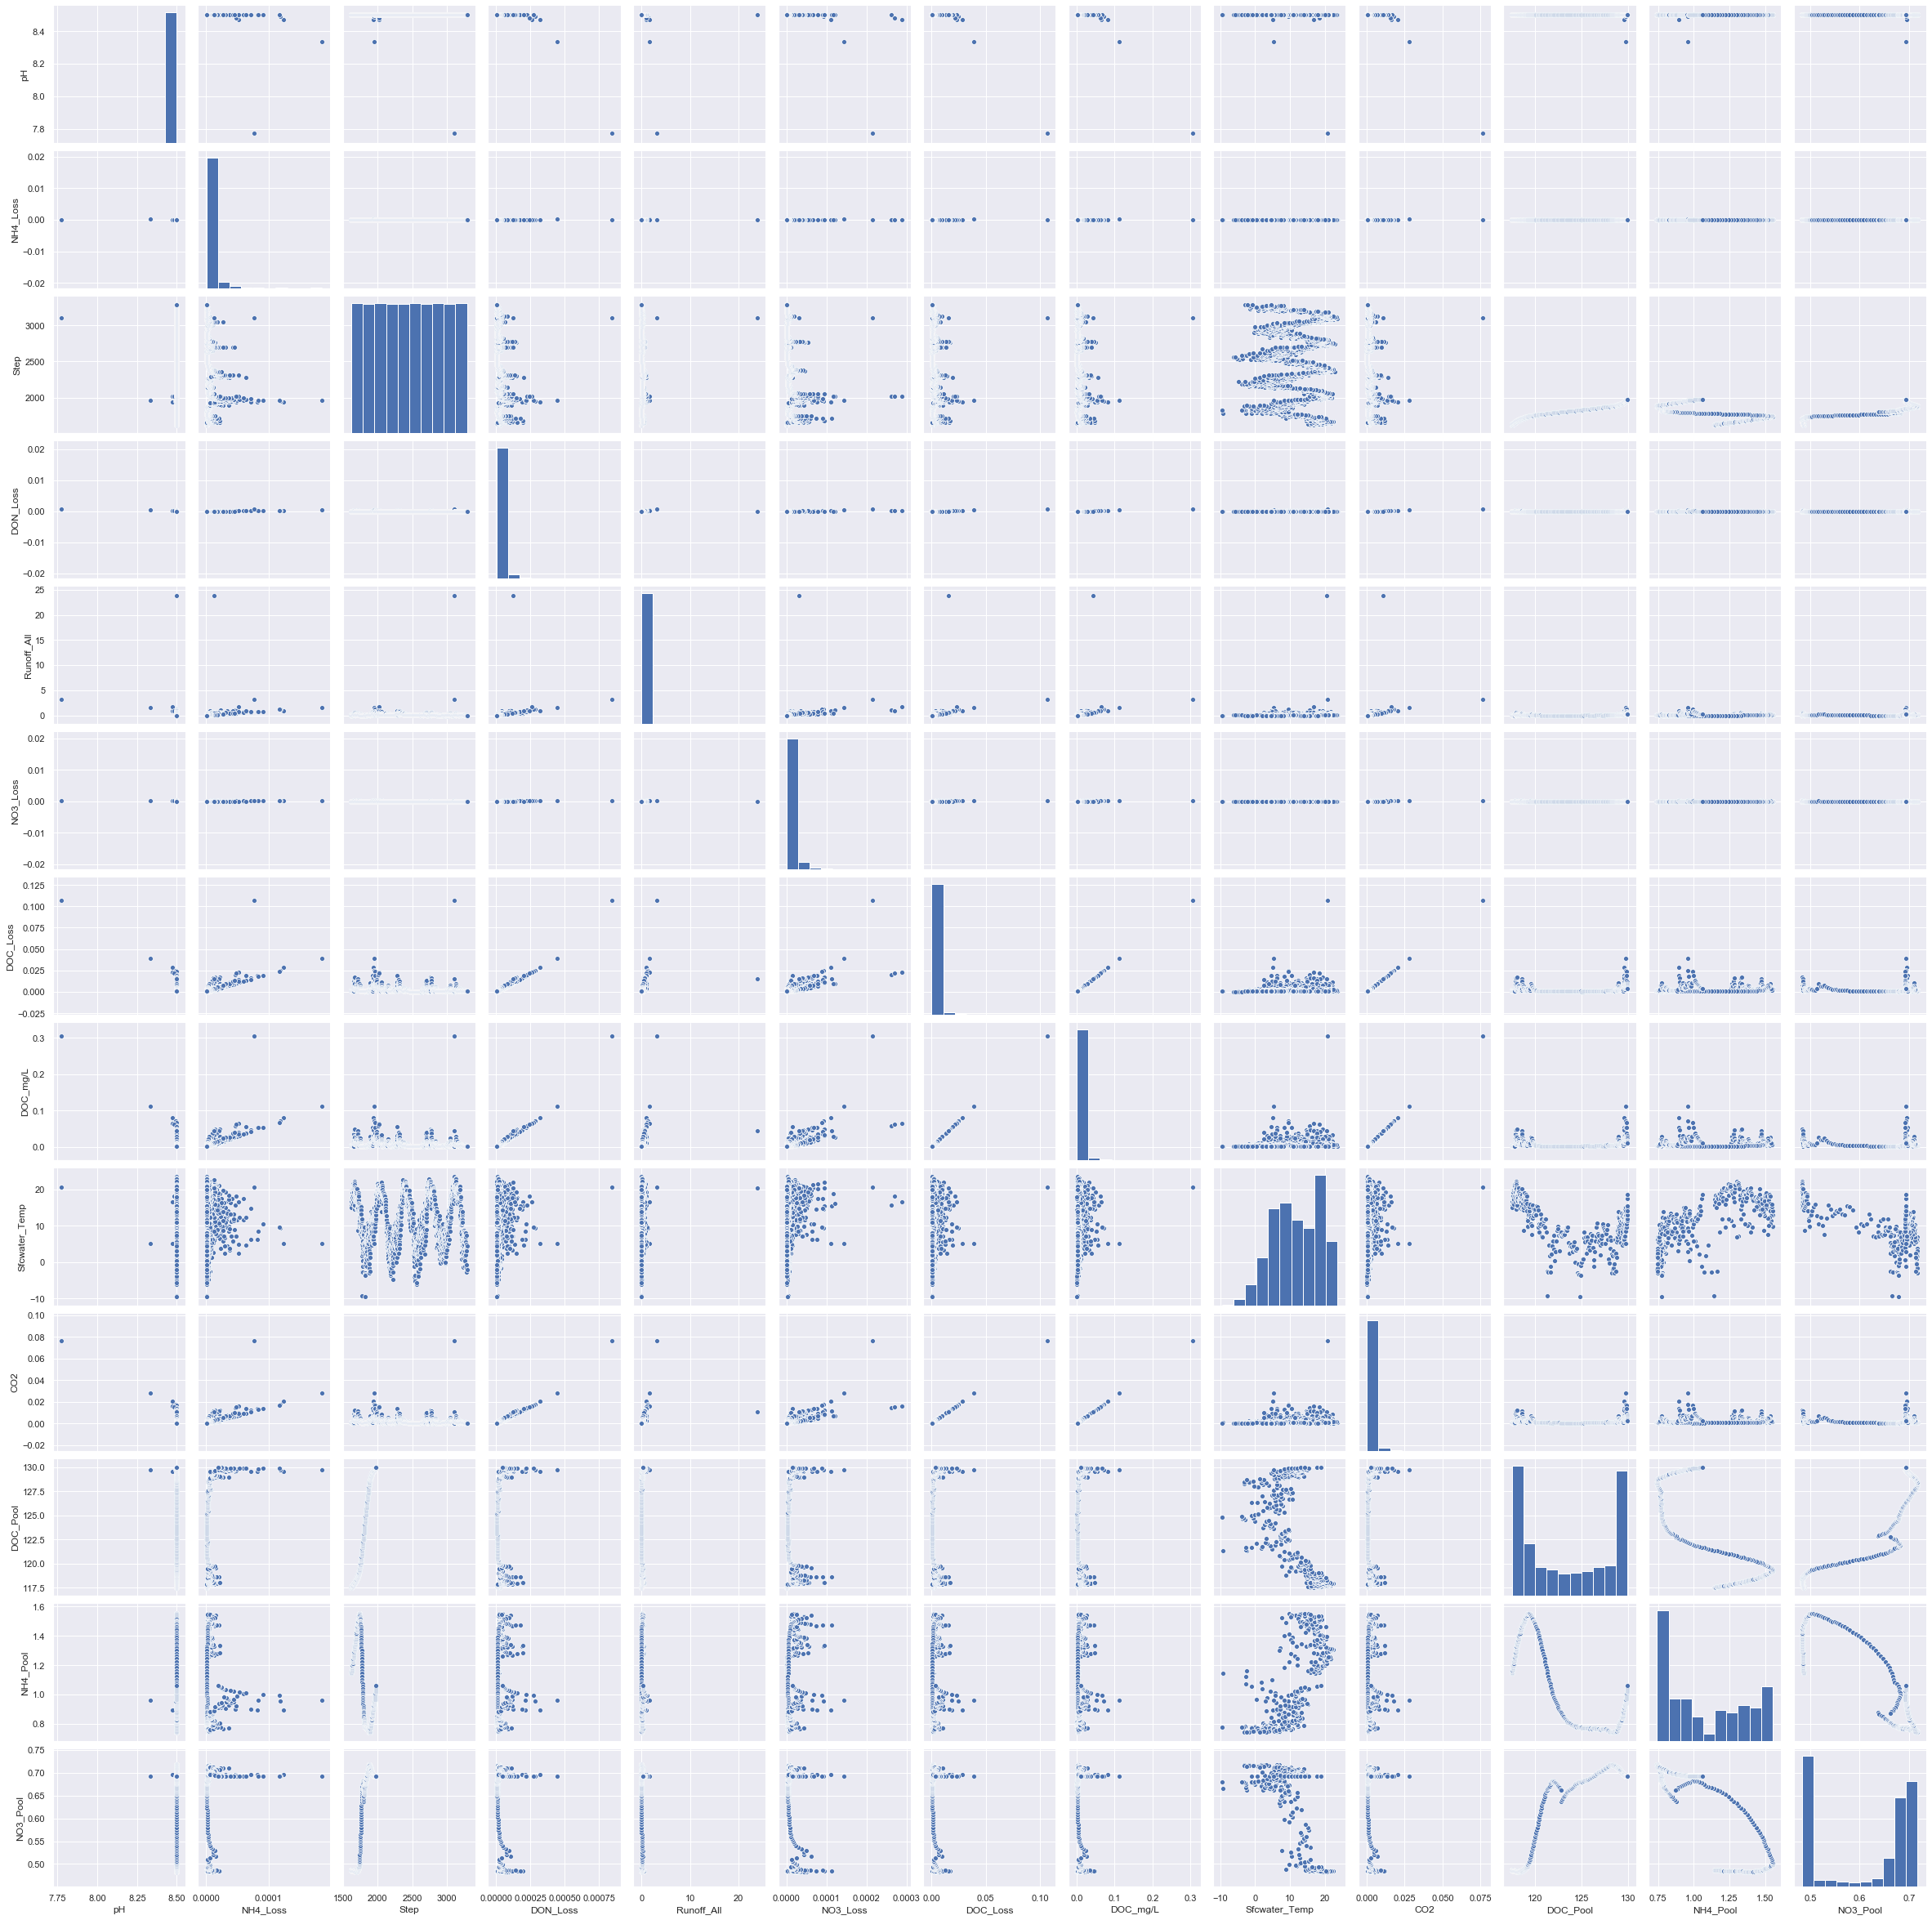

In [90]:
sns.pairplot(bc_pof.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

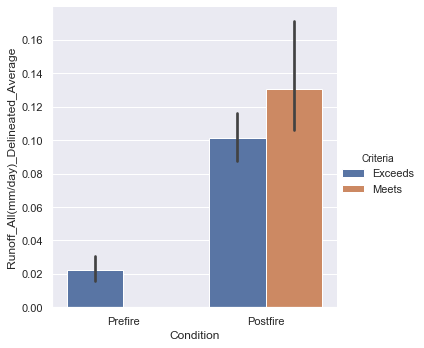

In [91]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Runoff_All(mm/day)_Delineated_Average',
            hue='Criteria')

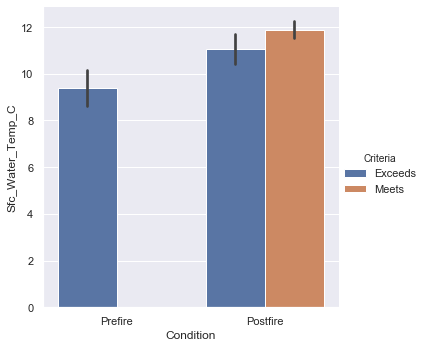

In [92]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Sfc_Water_Temp_C',
            hue='Criteria')

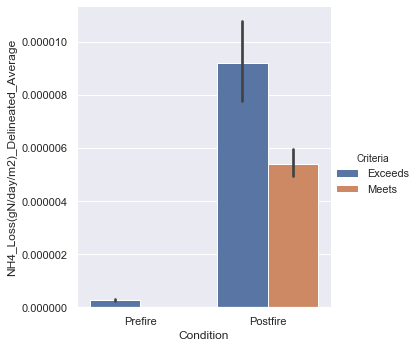

In [93]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

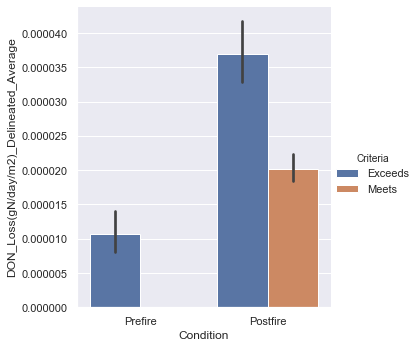

In [94]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DON_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

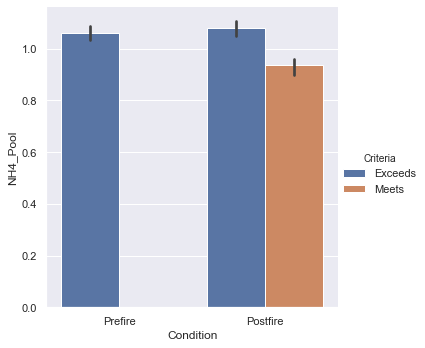

In [95]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Pool',
            hue='Criteria')

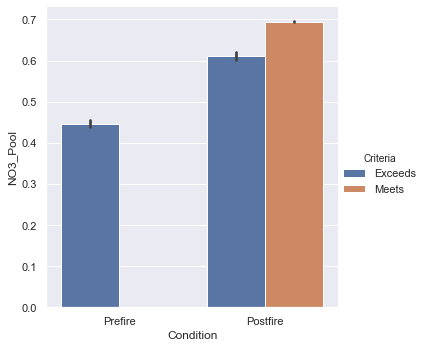

In [96]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NO3_Pool',
            hue='Criteria')

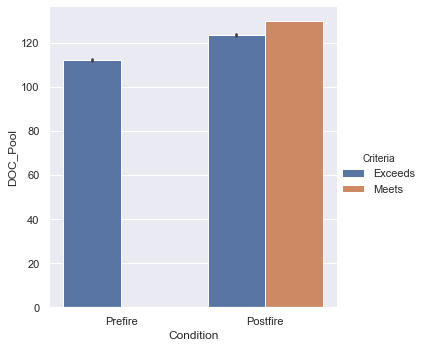

In [97]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Pool',
            hue='Criteria')

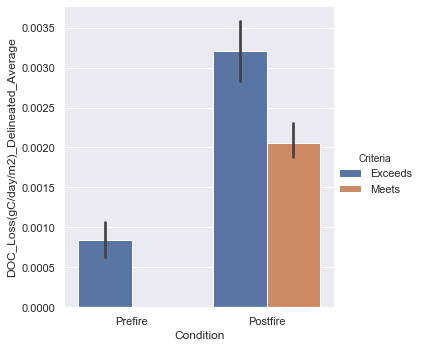

In [103]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Loss(gC/day/m2)_Delineated_Average',
            hue='Criteria')

In [101]:
#df_di_a.to_csv('072021_BCAPR21B_WQX_All_di.csv')

In [100]:
calc_pH(0.7, 22.9, 4.7, 50)

CO2 Estimate 15.909090909090908
Exponent value 5.853692464000001
H2CO3 value 1.400578760267948e-06
pkw= 1e-14
Alpha value= 2.2281934832444628e-05
SQRT of Alpha= 0.004720374437737395
A value 2.326023550138511
B value 0.43429448190325176
C value 0.00944074887547479



6.232002101795975

In [34]:
data_df.loc[:,['new_ph_column']]=data_df.apply(lambda row: calc_pH(row['CO2_calc'],row['Sfcwater_Temp_C'],row['DOC_mg/L'], row['Alk_200']),axis=1)


CO2 Estimate 100.27939818060229
Exponent value 5.87071689725
H2CO3 value 1.3467379635964128e-06
pkw= 1e-14
Alpha value= 0.00013505007250641814
SQRT of Alpha= 0.011621104616447532
A value 1.9347525891550406
B value 0.43429448190325176
C value 0.023242209232895064

CO2 Estimate 100.36828403549367
Exponent value 5.873138107250001
H2CO3 value 1.3392507330202396e-06
pkw= 1e-14
Alpha value= 0.0001344182979765185
SQRT of Alpha= 0.011593890545305251
A value 1.935770803999259
B value 0.43429448190325176
C value 0.023187781090610503

CO2 Estimate 100.4587968543431
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 1e-14
Alpha value= 0.00013499147110374965
SQRT of Alpha= 0.011618583007568076
A value 1.9348468348991212
B value 0.43429448190325176
C value 0.023237166015136153

CO2 Estimate 100.54882219335494
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 0.00013481108576774803
SQRT of Alpha= 0.011610817618400007
A value 1.93513719674

B value 0.43429448190325176
C value 0.021848921322687155

CO2 Estimate 105.8086443322646
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06
pkw= 1e-14
Alpha value= 0.00011631970787617775
SQRT of Alpha= 0.010785161467320633
A value 1.9671733485826293
B value 0.43429448190325176
C value 0.021570322934641267

CO2 Estimate 105.82698576115496
Exponent value 5.968385845250001
H2CO3 value 1.0755092619547499e-06
pkw= 1e-14
Alpha value= 0.00011381790336087559
SQRT of Alpha= 0.010668547387572292
A value 1.971894709395427
B value 0.43429448190325176
C value 0.021337094775144585

CO2 Estimate 105.84335289670292
Exponent value 5.9781472752500004
H2CO3 value 1.0516051995197726e-06
pkw= 1e-14
Alpha value= 0.00011130542025077898
SQRT of Alpha= 0.010550138399603058
A value 1.976741843135041
B value 0.43429448190325176
C value 0.021100276799206116

CO2 Estimate 105.85917161743357
Exponent value 5.980980967250001
H2CO3 value 1.04476600459291e-06
pkw= 1e-14
Alpha value= 0.0001105980637902

C value 0.01824974967756425

CO2 Estimate 106.52913953226174
Exponent value 6.061632031250001
H2CO3 value 8.676967459363006e-07
pkw= 1e-14
Alpha value= 9.243498772953764e-05
SQRT of Alpha= 0.009614311609758529
A value 2.017081806047031
B value 0.43429448190325176
C value 0.019228623219517058

CO2 Estimate 106.53732919353367
Exponent value 5.993978497250001
H2CO3 value 1.013961587670372e-06
pkw= 1e-14
Alpha value= 0.00010802475946523648
SQRT of Alpha= 0.01039349601747345
A value 1.983238346021612
B value 0.43429448190325176
C value 0.0207869920349469

CO2 Estimate 106.54412953726845
Exponent value 6.011172055249999
H2CO3 value 9.74603450768408e-07
pkw= 1e-14
Alpha value= 0.00010383827631613809
SQRT of Alpha= 0.010190106786297094
A value 1.9918212648202105
B value 0.43429448190325176
C value 0.02038021357259419

CO2 Estimate 106.55058864511685
Exponent value 6.0149967252500005
H2CO3 value 9.660581634181786e-07
pkw= 1e-14
Alpha value= 0.00010293406598762742
SQRT of Alpha= 0.01014564270944

Alpha value= 0.00011508458867149862
SQRT of Alpha= 0.0107277485369251
A value 1.9694914150880174
B value 0.43429448190325176
C value 0.0214554970738502

CO2 Estimate 107.35703872748164
Exponent value 5.98598774525
H2CO3 value 1.0327905482256251e-06
pkw= 1e-14
Alpha value= 0.00011087733489323543
SQRT of Alpha= 0.0105298307153171
A value 1.977578610770318
B value 0.43429448190325176
C value 0.0210596614306342

CO2 Estimate 107.37089534186589
Exponent value 5.96976543125
H2CO3 value 1.0720982046808511e-06
pkw= 1e-14
Alpha value= 0.00011511214414098999
SQRT of Alpha= 0.010729032768194438
A value 1.9694394283015095
B value 0.43429448190325176
C value 0.021458065536388876

CO2 Estimate 107.38966331561413
Exponent value 5.945047285249999
H2CO3 value 1.1348872443381085e-06
pkw= 1e-14
Alpha value= 0.00012187515908065458
SQRT of Alpha= 0.011039708287842329
A value 1.9570424022095527
B value 0.43429448190325176
C value 0.022079416575684657

CO2 Estimate 107.40200874250175
Exponent value 5.9781472

C value 0.025662031231782328

CO2 Estimate 128.1644087503744
Exponent value 5.88884265927264
H2CO3 value 1.2916871547271863e-06
pkw= 1e-14
Alpha value= 0.0001655483204860632
SQRT of Alpha= 0.012866558222231119
A value 1.8905376104379406
B value 0.43429448190325176
C value 0.025733116444462238

CO2 Estimate 130.16441665415525
Exponent value 5.89850913125
H2CO3 value 1.2632545429948371e-06
pkw= 1e-14
Alpha value= 0.00016443079068463446
SQRT of Alpha= 0.01282305699451712
A value 1.892008427423724
B value 0.43429448190325176
C value 0.02564611398903424

CO2 Estimate 132.9457694286636
Exponent value 5.879075681856641
H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 0.00017563005609160545
SQRT of Alpha= 0.013252549041282792
A value 1.8777005799844564
B value 0.43429448190325176
C value 0.026505098082565584

CO2 Estimate 135.74314810283357
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 0.00017953281412386488
SQRT of Alpha= 0.0133989855632

Alpha value= 0.00045014179461463373
SQRT of Alpha= 0.02121654530348034
A value 1.6733253309803986
B value 0.43429448190325176
C value 0.04243309060696068

CO2 Estimate 350.8504267948183
Exponent value 5.89796154725
H2CO3 value 1.264848333106837e-06
pkw= 1e-14
Alpha value= 0.00044377257751124823
SQRT of Alpha= 0.021065910317649417
A value 1.6764197690370246
B value 0.43429448190325176
C value 0.042131820635298835

CO2 Estimate 352.46883548171286
Exponent value 5.90800808525
H2CO3 value 1.2359244240548369e-06
pkw= 1e-14
Alpha value= 0.00043562484250001497
SQRT of Alpha= 0.020871627691677882
A value 1.68044368078844
B value 0.43429448190325176
C value 0.041743255383355764

CO2 Estimate 354.01987445504915
Exponent value 5.91087020525
H2CO3 value 1.2278061227121812e-06
pkw= 1e-14
Alpha value= 0.000434667769427707
SQRT of Alpha= 0.020848687474939686
A value 1.6809212807541805
B value 0.43429448190325176
C value 0.04169737494987937

CO2 Estimate 354.68033651304376
Exponent value 5.95819730525

Alpha value= 0.00046019392703101165
SQRT of Alpha= 0.02145213106036348
A value 1.668529558407702
B value 0.43429448190325176
C value 0.04290426212072696

CO2 Estimate 444.74423518001345
Exponent value 5.95752800525
H2CO3 value 1.1027371221366084e-06
pkw= 1e-14
Alpha value= 0.000490435977999255
SQRT of Alpha= 0.022145789170839116
A value 1.6547088389089604
B value 0.43429448190325176
C value 0.04429157834167823

CO2 Estimate 445.4833521098075
Exponent value 5.948940127250001
H2CO3 value 1.1247600250597236e-06
pkw= 1e-14
Alpha value= 0.0005010618662927168
SQRT of Alpha= 0.022384411233997575
A value 1.6500543241614252
B value 0.43429448190325176
C value 0.04476882246799515

CO2 Estimate 446.1628502554609
Exponent value 5.953538287250001
H2CO3 value 1.1129142743426764e-06
pkw= 1e-14
Alpha value= 0.0004965410047407165
SQRT of Alpha= 0.02228320005611215
A value 1.6520224406565052
B value 0.43429448190325176
C value 0.0445664001122243

CO2 Estimate 446.6511588088014
Exponent value 5.971149985

Alpha value= 0.0004981792455503362
SQRT of Alpha= 0.022319929335693163
A value 1.6513071846971425
B value 0.43429448190325176
C value 0.044639858671386326

CO2 Estimate 478.6060958883473
Exponent value 6.020403429321289
H2CO3 value 9.541058763421122e-07
pkw= 1e-14
Alpha value= 0.00045664088855022853
SQRT of Alpha= 0.021369157413202527
A value 1.670212601748467
B value 0.43429448190325176
C value 0.042738314826405055

CO2 Estimate 478.6829227107557
Exponent value 6.07868193125
H2CO3 value 8.342919799876309e-07
pkw= 1e-14
Alpha value= 0.00039936132338462245
SQRT of Alpha= 0.019984026705962502
A value 1.6993169985934184
B value 0.43429448190325176
C value 0.039968053411925004

CO2 Estimate 478.7819298657755
Exponent value 6.0641578463750685
H2CO3 value 8.626649511415066e-07
pkw= 1e-14
Alpha value= 0.00041302839014509545
SQRT of Alpha= 0.020323099914754526
A value 1.6920100477073976
B value 0.43429448190325176
C value 0.04064619982950905

CO2 Estimate 478.9704383189818
Exponent value 6.025

H2CO3 value 1.2081866444090015e-06
pkw= 1e-14
Alpha value= 0.0006540888461204406
SQRT of Alpha= 0.02557516072521228
A value 1.592181628315569
B value 0.43429448190325176
C value 0.05115032145042456

CO2 Estimate 542.3203443886035
Exponent value 5.935510795250001
H2CO3 value 1.1600833796182916e-06
pkw= 1e-14
Alpha value= 0.000629136817964087
SQRT of Alpha= 0.02508259990439761
A value 1.600627449276234
B value 0.43429448190325176
C value 0.05016519980879522

CO2 Estimate 543.2973514791546
Exponent value 5.933637031250001
H2CO3 value 1.1650993735571457e-06
pkw= 1e-14
Alpha value= 0.0006329954038736195
SQRT of Alpha= 0.025159399910840867
A value 1.5992997216734486
B value 0.43429448190325176
C value 0.050318799821681734

CO2 Estimate 544.2122048904093
Exponent value 5.933637031250001
H2CO3 value 1.1650993735571457e-06
pkw= 1e-14
Alpha value= 0.000634061299009969
SQRT of Alpha= 0.025180573841951437
A value 1.5989343769464535
B value 0.43429448190325176
C value 0.050361147683902874

CO2 Esti

B value 0.43429448190325176
C value 0.05942937856760911

CO2 Estimate 677.1927560054869
Exponent value 5.878073677250001
H2CO3 value 1.3241168821762682e-06
pkw= 1e-14
Alpha value= 0.0008966823607243396
SQRT of Alpha= 0.029944654960849686
A value 1.5236806867361368
B value 0.43429448190325176
C value 0.05988930992169937

CO2 Estimate 680.0230151947039
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 1e-14
Alpha value= 0.0009137806750049316
SQRT of Alpha= 0.03022880538501202
A value 1.5195790154073197
B value 0.43429448190325176
C value 0.06045761077002404

CO2 Estimate 682.681730229064
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 0.0009091340279691618
SQRT of Alpha= 0.0301518494950005
A value 1.5206860433633702
B value 0.43429448190325176
C value 0.060303698990001

CO2 Estimate 685.1267828505969
Exponent value 5.880588037250001
H2CO3 value 1.3164730191343728e-06
pkw= 1e-14
Alpha value= 0.0009019509243191451
SQRT of Alpha=

C value 0.06710235592079757

CO2 Estimate 892.9736587110818
Exponent value 5.8952422572500005
H2CO3 value 1.2727928962562626e-06
pkw= 1e-14
Alpha value= 0.0011365705293614292
SQRT of Alpha= 0.03371306170257204
A value 1.4722018045792367
B value 0.43429448190325176
C value 0.06742612340514408

CO2 Estimate 894.2896592807109
Exponent value 5.91492932946036
H2CO3 value 1.216383920532327e-06
pkw= 1e-14
Alpha value= 0.00108779956185739
SQRT of Alpha= 0.03298180652810561
A value 1.4817255602227128
B value 0.43429448190325176
C value 0.06596361305621122

CO2 Estimate 895.5668564552659
Exponent value 5.916687595250001
H2CO3 value 1.2114692767064332e-06
pkw= 1e-14
Alpha value= 0.0010849517318421151
SQRT of Alpha= 0.03293860549328273
A value 1.4822947913044604
B value 0.43429448190325176
C value 0.06587721098656546

CO2 Estimate 897.2247753829996
Exponent value 5.90182072465876
H2CO3 value 1.2536585743015389e-06
pkw= 1e-14
Alpha value= 0.0011248135327446699
SQRT of Alpha= 0.033538239857581524
A 

Exponent value 6.00062816525
H2CO3 value 9.985546415974415e-07
pkw= 1e-14
Alpha value= 0.0009303669238632092
SQRT of Alpha= 0.03050191672441601
A value 1.5156728689587173
B value 0.43429448190325176
C value 0.06100383344883202

CO2 Estimate 931.9995395832378
Exponent value 5.996183875250001
H2CO3 value 1.0088256705477753e-06
pkw= 1e-14
Alpha value= 0.0009402250604802777
SQRT of Alpha= 0.03066308954558033
A value 1.513384088718505
B value 0.43429448190325176
C value 0.06132617909116066

CO2 Estimate 932.3011921067548
Exponent value 5.99251445525
H2CO3 value 1.017385502507105e-06
pkw= 1e-14
Alpha value= 0.0009485097168295038
SQRT of Alpha= 0.03079788494084462
A value 1.5114791078521719
B value 0.43429448190325176
C value 0.06159576988168924

CO2 Estimate 932.5666736263206
Exponent value 6.00062816525
H2CO3 value 9.985546415974415e-07
pkw= 1e-14
Alpha value= 0.0009312187805586488
SQRT of Alpha= 0.0305158775157892
A value 1.5154741369384053
B value 0.43429448190325176
C value 0.06103175503

CO2 Estimate 960.270055302095
Exponent value 6.002119531250001
H2CO3 value 9.951314887466618e-07
pkw= 1e-14
Alpha value= 0.000955594969741613
SQRT of Alpha= 0.030912699166226378
A value 1.509863072522617
B value 0.43429448190325176
C value 0.061825398332452756

CO2 Estimate 960.4926385959506
Exponent value 6.011172055249999
H2CO3 value 9.74603450768408e-07
pkw= 1e-14
Alpha value= 0.0009360994400232668
SQRT of Alpha= 0.030595742187815394
A value 1.5143390072765093
B value 0.43429448190325176
C value 0.06119148437563079

CO2 Estimate 960.7668947525934
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 0.0009610227857685797
SQRT of Alpha= 0.031000367510218
A value 1.5086331575620613
B value 0.43429448190325176
C value 0.062000735020436

CO2 Estimate 960.931662937708
Exponent value 6.0298136461944845
H2CO3 value 9.336548419418363e-07
pkw= 1e-14
Alpha value= 0.0008971784998870117
SQRT of Alpha= 0.02995293808438517
A value 1.5235605712295055
B value 0

SQRT of Alpha= 0.03699002589095902
A value 1.4319153647025378
B value 0.43429448190325176
C value 0.07398005178191804

CO2 Estimate 1032.7453401919774
Exponent value 5.86596762725
H2CO3 value 1.361546169712211e-06
pkw= 1e-14
Alpha value= 0.0014061304622365212
SQRT of Alpha= 0.0374984061292813
A value 1.4259871915781204
B value 0.43429448190325176
C value 0.0749968122585626

CO2 Estimate 1035.6650519313976
Exponent value 5.866907532684642
H2CO3 value 1.3586026811387132e-06
pkw= 1e-14
Alpha value= 0.0014070573163256614
SQRT of Alpha= 0.03751076267320702
A value 1.4258441056333873
B value 0.43429448190325176
C value 0.07502152534641404

CO2 Estimate 1038.1267276153928
Exponent value 5.8775745312500005
H2CO3 value 1.3256395992014367e-06
pkw= 1e-14
Alpha value= 0.0013761818991263684
SQRT of Alpha= 0.03709692573686354
A value 1.4306620793562919
B value 0.43429448190325176
C value 0.07419385147372708

CO2 Estimate 1040.0918563367923
Exponent value 5.88989682725
H2CO3 value 1.288555629811343e-

H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 0.0016548865794500365
SQRT of Alpha= 0.04068029718979492
A value 1.3906158830006066
B value 0.43429448190325176
C value 0.08136059437958984

CO2 Estimate 1254.9678014718359
Exponent value 5.88109464877584
H2CO3 value 1.3149382274536986e-06
pkw= 1e-14
Alpha value= 0.0016502051363888408
SQRT of Alpha= 0.04062271699909843
A value 1.3912310327220971
B value 0.43429448190325176
C value 0.08124543399819686

CO2 Estimate 1257.2586642207307
Exponent value 5.880588037250001
H2CO3 value 1.3164730191343728e-06
pkw= 1e-14
Alpha value= 0.001655147109529514
SQRT of Alpha= 0.04068349922916555
A value 1.3905817000324703
B value 0.43429448190325176
C value 0.0813669984583311

CO2 Estimate 1259.5223255946862
Exponent value 5.881602461691041
H2CO3 value 1.3134015918189974e-06
pkw= 1e-14
Alpha value= 0.0016542586273776264
SQRT of Alpha= 0.040672578322226226
A value 1.3906982958613836
B value 0.43429448190325176
C value 0.08134515664445245

CO2 Est

A value 1.4044898621112956
B value 0.43429448190325176
C value 0.07880252502251228

CO2 Estimate 1354.238000612111
Exponent value 5.98027068125
H2CO3 value 1.0464761111314554e-06
pkw= 1e-14
Alpha value= 0.0014171777164369993
SQRT of Alpha= 0.03764542092256373
A value 1.4242878425444419
B value 0.43429448190325176
C value 0.07529084184512747

CO2 Estimate 1354.5519376275356
Exponent value 5.98598774525
H2CO3 value 1.0327905482256251e-06
pkw= 1e-14
Alpha value= 0.0013989684382724253
SQRT of Alpha= 0.03740278650411524
A value 1.4270960416957388
B value 0.43429448190325176
C value 0.07480557300823049

CO2 Estimate 1354.813714300336
Exponent value 5.996183875250001
H2CO3 value 1.0088256705477753e-06
pkw= 1e-14
Alpha value= 0.0013667708538063585
SQRT of Alpha= 0.036969864130212304
A value 1.432152145521226
B value 0.43429448190325176
C value 0.07393972826042461

CO2 Estimate 1355.1543652108621
Exponent value 5.981692495250001
H2CO3 value 1.0430557096912576e-06
pkw= 1e-14
Alpha value= 0.00141

A value 1.4622563974868268
B value 0.43429448190325176
C value 0.06898800690739518

CO2 Estimate 1379.3370700034034
Exponent value 6.0641578463750685
H2CO3 value 8.626649511415066e-07
pkw= 1e-14
Alpha value= 0.001189905746112155
SQRT of Alpha= 0.03449501045241406
A value 1.4622437191207767
B value 0.43429448190325176
C value 0.06899002090482811

CO2 Estimate 1379.4284237249726
Exponent value 6.049992696153084
H2CO3 value 8.912659270765605e-07
pkw= 1e-14
Alpha value= 0.0012294375529169962
SQRT of Alpha= 0.03506333630613317
A value 1.455146762788502
B value 0.43429448190325176
C value 0.07012667261226634

CO2 Estimate 1379.615615982617
Exponent value 6.012698199288169
H2CO3 value 9.71184630190219e-07
pkw= 1e-14
Alpha value= 0.0013398614818227294
SQRT of Alpha= 0.036604118372428114
A value 1.436470048873398
B value 0.43429448190325176
C value 0.07320823674485623

CO2 Estimate 1379.8314720547137
Exponent value 6.00436589525
H2CO3 value 9.899975156310616e-07
pkw= 1e-14
Alpha value= 0.001366

A value 1.409554606747995
B value 0.43429448190325176
C value 0.07788886743709968

CO2 Estimate 1417.735271836644
Exponent value 5.9380265352500015
H2CO3 value 1.1533827843593936e-06
pkw= 1e-14
Alpha value= 0.0016351914553254703
SQRT of Alpha= 0.040437500606806426
A value 1.3932156954701873
B value 0.43429448190325176
C value 0.08087500121361285

CO2 Estimate 1419.0600470433503
Exponent value 5.91087020525
H2CO3 value 1.2278061227121812e-06
pkw= 1e-14
Alpha value= 0.0017423306142660615
SQRT of Alpha= 0.041741233981113464
A value 1.379434716188945
B value 0.43429448190325176
C value 0.08348246796222693

CO2 Estimate 1420.7852381886755
Exponent value 5.8957836312500005
H2CO3 value 1.2712072724153442e-06
pkw= 1e-14
Alpha value= 0.0018061125273358114
SQRT of Alpha= 0.042498382643764356
A value 1.371627597532135
B value 0.43429448190325176
C value 0.08499676528752871

CO2 Estimate 1422.4811805437428
Exponent value 5.8968701052500005
H2CO3 value 1.268031069269592e-06
pkw= 1e-14
Alpha value= 

H2CO3 value 1.3989404206295284e-06
pkw= 1e-14
Alpha value= 0.0021393088921826545
SQRT of Alpha= 0.04625266362257048
A value 1.3348632518271217
B value 0.43429448190325176
C value 0.09250532724514096

CO2 Estimate 1532.0491962617298
Exponent value 5.862717037250001
H2CO3 value 1.371775249476677e-06
pkw= 1e-14
Alpha value= 0.0021016271684224765
SQRT of Alpha= 0.04584350737479056
A value 1.3387221629593709
B value 0.43429448190325176
C value 0.09168701474958112

CO2 Estimate 1534.5442155666183
Exponent value 5.87071689725
H2CO3 value 1.3467379635964128e-06
pkw= 1e-14
Alpha value= 0.002066628951930842
SQRT of Alpha= 0.04546019084793686
A value 1.342368745381134
B value 0.43429448190325176
C value 0.09092038169587371

CO2 Estimate 1537.2539209919926
Exponent value 5.86503267725
H2CO3 value 1.3644804662842214e-06
pkw= 1e-14
Alpha value= 0.0020975529469224015
SQRT of Alpha= 0.04579904962903053
A value 1.3391435338989723
B value 0.43429448190325176
C value 0.09159809925806106

CO2 Estimate 154

Exponent value 5.91434573525
H2CO3 value 1.2180195659593493e-06
pkw= 1e-14
Alpha value= 0.0020784328228931575
SQRT of Alpha= 0.04558983245081251
A value 1.3411320038897527
B value 0.43429448190325176
C value 0.09117966490162502

CO2 Estimate 1707.2310231632125
Exponent value 5.93488496525
H2CO3 value 1.1617562959610821e-06
pkw= 1e-14
Alpha value= 0.001983386389829942
SQRT of Alpha= 0.044535226392485555
A value 1.3512963356294614
B value 0.43429448190325176
C value 0.08907045278497111

CO2 Estimate 1707.9115450165257
Exponent value 5.94569298725
H2CO3 value 1.1332011660962206e-06
pkw= 1e-14
Alpha value= 0.0019354073544119248
SQRT of Alpha= 0.04399326487556845
A value 1.3566138064971498
B value 0.43429448190325176
C value 0.0879865297511369

CO2 Estimate 1708.6763033857776
Exponent value 5.938658575250001
H2CO3 value 1.1517054573659988e-06
pkw= 1e-14
Alpha value= 0.001967891823491361
SQRT of Alpha= 0.04436092676546964
A value 1.3529993893730767
B value 0.43429448190325176
C value 0.08872

A value 1.3399885206967501
B value 0.43429448190325176
C value 0.09142005431254704

CO2 Estimate 1756.064803376276
Exponent value 5.982405265250001
H2CO3 value 1.0413452365090698e-06
pkw= 1e-14
Alpha value= 0.0018286697180071212
SQRT of Alpha= 0.0427629479573979
A value 1.3689323633907553
B value 0.43429448190325176
C value 0.0855258959147958

CO2 Estimate 1756.6047360444204
Exponent value 5.956193131250001
H2CO3 value 1.1061317765286751e-06
pkw= 1e-14
Alpha value= 0.0019430363173494993
SQRT of Alpha= 0.044079885632218915
A value 1.3557595409566494
B value 0.43429448190325176
C value 0.08815977126443783

CO2 Estimate 1757.0399580434441
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pkw= 1e-14
Alpha value= 0.001895703495779157
SQRT of Alpha= 0.043539677258555294
A value 1.3611147945266195
B value 0.43429448190325176
C value 0.08707935451711059

CO2 Estimate 1757.5640963648495
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value

CO2 Estimate 1780.1903755318492
Exponent value 6.00586968125
H2CO3 value 9.865754829351352e-07
pkw= 1e-14
Alpha value= 0.0017562921794668138
SQRT of Alpha= 0.04190813977578597
A value 1.3777016162609121
B value 0.43429448190325176
C value 0.08381627955157193

CO2 Estimate 1780.5470157810487
Exponent value 5.9781472752500004
H2CO3 value 1.0516051995197726e-06
pkw= 1e-14
Alpha value= 0.0018724324997947653
SQRT of Alpha= 0.04327161309443831
A value 1.3637969147167976
B value 0.43429448190325176
C value 0.08654322618887662

CO2 Estimate 1780.9841876994233
Exponent value 5.966325781250001
H2CO3 value 1.080623029651281e-06
pkw= 1e-14
Alpha value= 0.0019245725286827764
SQRT of Alpha= 0.04386995017871318
A value 1.357832858805044
B value 0.43429448190325176
C value 0.08773990035742636

CO2 Estimate 1781.319378835768
Exponent value 5.981692495250001
H2CO3 value 1.0430557096912576e-06
pkw= 1e-14
Alpha value= 0.0018580153488883323
SQRT of Alpha= 0.043104702166797675
A value 1.3654753513310451
B v

H2CO3 value 1.2147469540416019e-06
pkw= 1e-14
Alpha value= 0.00223386770580114
SQRT of Alpha= 0.04726380968353207
A value 1.3254712751316482
B value 0.43429448190325176
C value 0.09452761936706414

CO2 Estimate 1840.2494514616733
Exponent value 5.90914919962596
H2CO3 value 1.2326812791919788e-06
pkw= 1e-14
Alpha value= 0.0022684410478701123
SQRT of Alpha= 0.04762815394144636
A value 1.3221362513370432
B value 0.43429448190325176
C value 0.09525630788289272

CO2 Estimate 1841.9178024579319
Exponent value 5.894163235250001
H2CO3 value 1.275959132775207e-06
pkw= 1e-14
Alpha value= 0.0023502118418774376
SQRT of Alpha= 0.04847898350705631
A value 1.314446494904156
B value 0.43429448190325176
C value 0.09695796701411262

CO2 Estimate 1843.8930707599532
Exponent value 5.88467559725
H2CO3 value 1.3041405619877234e-06
pkw= 1e-14
Alpha value= 0.0024046957455561542
SQRT of Alpha= 0.04903769718855234
A value 1.3094699324901822
B value 0.43429448190325176
C value 0.09807539437710468

CO2 Estimate 1

CO2 Estimate 2015.614473286132
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 0.0026842137760203066
SQRT of Alpha= 0.05180939852980641
A value 1.285591449533036
B value 0.43429448190325176
C value 0.10361879705961281

CO2 Estimate 2017.2134071535145
Exponent value 5.8952422572500005
H2CO3 value 1.2727928962562626e-06
pkw= 1e-14
Alpha value= 0.002567494894867885
SQRT of Alpha= 0.05067045386483019
A value 1.295245205634166
B value 0.43429448190325176
C value 0.10134090772966038

CO2 Estimate 2019.1637164878503
Exponent value 5.883646268941441
H2CO3 value 1.3072351922925973e-06
pkw= 1e-14
Alpha value= 0.00263952186920323
SQRT of Alpha= 0.05137627729996822
A value 1.2892373676962696
B value 0.43429448190325176
C value 0.10275255459993644

CO2 Estimate 2021.564457192144
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 0.002719499136005156
SQRT of Alpha= 0.05214881720619516
A value 1.2827555374128683
B value 

H2CO3 value 1.1533827843593936e-06
pkw= 1e-14
Alpha value= 0.0024972987837672896
SQRT of Alpha= 0.04997298053715917
A value 1.3012647471706065
B value 0.43429448190325176
C value 0.09994596107431834

CO2 Estimate 2165.873308513671
Exponent value 5.939291857250001
H2CO3 value 1.1500272807895741e-06
pkw= 1e-14
Alpha value= 0.002490813391534695
SQRT of Alpha= 0.04990804936615631
A value 1.3018294040082423
B value 0.43429448190325176
C value 0.09981609873231262

CO2 Estimate 2166.8478782050333
Exponent value 5.921430931250001
H2CO3 value 1.1983096832232253e-06
pkw= 1e-14
Alpha value= 0.0025965547945347913
SQRT of Alpha= 0.05095640091818487
A value 1.292801254074804
B value 0.43429448190325176
C value 0.10191280183636973

CO2 Estimate 2167.8405821463557
Exponent value 5.91845703125
H2CO3 value 1.2065434567400433e-06
pkw= 1e-14
Alpha value= 0.0026155938696542113
SQRT of Alpha= 0.051142877017764765
A value 1.2912148445968425
B value 0.43429448190325176
C value 0.10228575403552953

CO2 Estimat

KeyError: "None of [Index(['new_ph_column'], dtype='object')] are in the [columns]"

In [35]:
data_df.head()

Unnamed: 0  Unnamed: 0.1  Step  Runoff_All(mm/day)_Delineated_Average  \
0        1309          1309  1309                               0.033263   
1        1310          1310  1310                               0.049179   
2        1311          1311  1311                               0.059759   
3        1312          1312  1312                               0.043197   
4        1313          1313  1313                               0.033944   

   DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            1.723507                           62.777660   
1                            1.723849                           62.833305   
2                            1.724200                           62.889969   
3                            1.724550                           62.946327   
4                            1.724894                           62.999870   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                            0.217128                            0.052924   
1                            0.218451                            0.053354   
2                            0.216999                            0.053639   
3                            0.215869                            0.053804   
4                            0.215563                            0.053926   

   Sfcwater_Temp_C       CO2  DOC_mg/L  CO2_calc  pH_calc_200 Criteria  \
0        20.112500  1.122465  4.489858  4.412294          0.0    Meets   
1        19.737500  1.123459  4.493838  4.416204          0.0    Meets   
2        19.962502  1.124473  4.497891  4.420187          0.0    Meets   
3        19.812500  1.125480  4.501921  4.424148          0.0    Meets   
4        19.287498  1.126438  4.505751  4.427911          0.0    Meets   

  Condition  Alk_200  
0   Prefire      200  
1   Prefire      200  
2   Prefire      200  
3   Prefire      200  
4   Prefire      200